# Analyse de données éducatives pour academy

# Objectifs

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

# Sommaire

**[I Découverte du dataset](#I-Découverte-du-dataset)**\
[I.1 EdStatsData.csv](#I.1-EdStatsData.csv)\
[I.2 EdStatsSeries.csv](#I.2-EdStatsSeries.csv)\
[I.3 EdStatsCountry.csv](#I.3-EdStatsCountry.csv)\
[I.4 EdStatsCountry-Series.csv](#I.4-EdStatsCountry-Series.csv)\
[I.5 EdStatsFootNote.csv](#I.5-EdStatsFootNote.csv)\
**[II Présélection des indicateurs](#II-Présélection-des-indicateurs)**\
**[III Filtre pays/régions](#III-Filtre-pays/régions)**\
**[IV Création des datasets pays/données réelles, pays/prospectives, regions/données réelles, regions/prospectives](#IV-Création-des-datasets-pays/données-réelles,-pays/prospectives,-regions/données-réelles,-regions/prospectives)**\
[IV.1 Restriction du jeu de données aux indicateurs choisis](#IV.1-Restriction-du-jeu-de-données-aux-indicateurs-choisis)\
[IV.2 Données passées vs données prospectives](#IV.2-Données-passées-vs-données-prospectives)\
[IV.3 Réarrangement des datasets real_data et exportation au format csv](#IV.3-Réarrangement-des-datasets-real_data-et-exportation-au-format-csv)\
[IV.4 prospective data](#IV.4-prospective-data)\
**[V Nettoyage et sélection des indicateurs](#V-Nettoyage-et-sélection-des-indicateurs)**\
[V.1 Chargement des datasets](#V.1-Chargement-des-datasets)\
[V.2 Nettoyage: restriction aux années 2000 à 2016 et sélection des pays](#V.2-Nettoyage:-restriction-aux-années-2000-à-2016-et-sélection-des-pays)\
[V.2.1 Restriction aux années 2000 à 2016](#V.2.1-Restriction-aux-années-2000-à-2016)\
[V.2.2 Restriction aux pays ayant une population de lycéens minimale](#V.2.2-Restriction-aux-pays-ayant-une-population-de-lycéens-minimale)\
[V.2.3 Nettoyage par le taux de remplissage](#V.2.3-Nettoyage-par-le-taux-de-remplissage)\
[V.2.4 Sélection d'indicateurs grâce à leurs corrélations](#V.2.4-Sélection-d'indicateurs-grâce-à-leurs-corrélations)\
**[VI Visualisation et analyse de données](#VI-Visualisation-et-analyse-de-données)**\
[VI.1 Statistiques sur les pays](#VI.1-Statistiques-sur-les-pays)\
[VI.2 Statistiques sur les regions](#VI.2-Statistiques-sur-les-regions)\
[VI.3 Scoring](#VI.3-Scoring)\
[VI.4 Sélection de pays](#VI.4-Sélection-de-pays)\
[VI.5 Potentiel de croissance des pays sélectionnés](#VI.5-Potentiel-de-croissance-des-pays-sélectionnés)

## I Découverte du dataset

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## I.1 EdStatsData.csv

In [2]:
data = pd.read_csv("./EdStats/EdStatsData.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [4]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Beaucoup de NaN en effet! Probablement trompeur, car toutes les années "intéressantes", c'est-à-dire ni trop anciennes, ni prospectives ne sont visibles. Les colonnes 1970 à 2100 ne sont pas entièrement remplies, leur taux de remplissage varie:

In [5]:
cols = data.columns
tr = data[cols[4:-1]].notna().sum()/data.shape[0]
print("Taux de remplissage minimum: {:.2f}".format(tr.min()))
print("Taux de remplissage moyen: {:.2f}".format(tr.mean()))
print("Taux de remplissage maximum: {:.2f}".format(tr.max()))

Taux de remplissage minimum: 0.00
Taux de remplissage moyen: 0.09
Taux de remplissage maximum: 0.27


On peut même se dire que le tableau est majoritairement composé de NaN. Il nous faudra donc faire beaucoup de nettoyage pour récupérer des infos.

In [6]:
# Doublons ?
data[data.duplicated()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


Non.

Combien y'a-t-il d'"Indicator Codes" différents?

In [7]:
data['Indicator Code'].unique().size

3665

On vérifie qu'il y a autant d'"Indicator Names" différents:

In [8]:
data['Indicator Name'].unique().size

3665

Il y a donc 3665 séries différentes, cacune étant repérée par un code (Indicator Code) et son nom (Indicator Name) Exemples de séries?

In [9]:
print(data['Indicator Name'].sample(10).to_numpy())

['Barro-Lee: Percentage of population age 35-39 with tertiary schooling. Completed Tertiary'
 'Repetition rate in Grade 3 of lower secondary general education, male (%)'
 'EGRA: Oral Reading Fluency - Correct Words Read Per Minute (Mean). Chichewa. 2nd Grade'
 'SABER: (Education Management Information Systems) Policy Goal 1 Lever 2: Organizational Structure'
 'UIS: Net attendance rate, primary, urban, gender parity index (GPI)'
 'Population of the official age for tertiary education, female (number)'
 'Wittgenstein Projection: Percentage of the population age 40-64 by highest level of educational attainment. Primary. Female'
 'EGRA: Listening Comprehension - Share of students with a zero score (%). Afan Oromo. 3rd Grade'
 'Wittgenstein Projection: Percentage of the population age 40-64 by highest level of educational attainment. Post Secondary. Total'
 'PASEC: Distribution of 2nd grade language scores: 5th Percentile Score']


* Donc, le dataset comporte 70 colonnes - essentiellement les années de 1970 à 2100 - et 886930 lignes au total. Il semble de plus qu'il manque énormément de données, notamment l'année 2017 (seulement 143 non-null sur 886930 au total!). Les données sont au format float64, sauf pour les quatre premières colonnes (format object, ce qui revient ici à des chaînes de caractères).
* Colonnes: Country Name, Country Code, Indicator Name, Indicator Code, puis années de 1970 à 2100, avec des pas variables: 1 colonne/ année entre 1970 et 2017, puis saut à 2020, puis tous les 5 ans jusqu'à 2100: on a affaire à des séries temporelles, avec des données prospectives (surement à partir de 2020, 2020 inclus). 
* La colonne Unnamed: 69 est entièrement vide; il s'agit surement d'un artefact produit lors de la conversion de la table au format csv depuis le site web https://datacatalog.worldbank.org/dataset/education-statistics
* La colonne 'Indicator Name' contient le nom des différentes séries du dataset. Il y en a 3665. 
* Le dataset ne contient pas de doublons a priori

## I.2 EdStatsSeries.csv

In [10]:
df_series = pd.read_csv('EdStats/EdStatsSeries.csv')
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

* La table contient 3665 lignes - très vraisemblablement les 'Indicators' repérés dans la table EdStatsData.csv
* La table contient 21 colonnes en tout, dont seulement 6 sont remplies à plus de 15%. Ces colonnes sont:
    - Series Code
    - Topic
    - Indicator Name
    - Short definition
    - Long definition
    - Source
     
mais en réalité la colonne Short definition est elle-même incomplète. Donc seulement 5 colonnes réellement intéressantes.

In [11]:
df_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On peut regarder les colonnes intéressantes un peu plus en détail:

In [12]:
print(df_series['Topic'].unique())

['Attainment' 'Education Equality' 'Infrastructure: Communications'
 'Learning Outcomes'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Teachers' 'Education Management Information Systems (SABER)'
 'Early Child Development (SABER)' 'Engaging the Private Sector (SABER)'
 'School Health and School Feeding (SABER)'
 'School Autonomy and Accountability (SABER)' 'School Finance (SABER)'
 'Student Assessment (SABER)' 'Teachers (SABER)'
 'Tertiary Education (SABER)' 'Workforce Development (SABER)' 'Literacy'
 'Background' 'Primary' 'Secondary' 'Tertiary' 'Early Childhood Education'
 'Pre-Primary' 'Expenditures' 'Health: Risk factors' 'Health: Mortality'
 'Social Protection & Labor: Labor force structure' 'Laber'
 'Social Protection 

In [13]:
df_series['Topic'].unique().size

37

La colonne Topic est particulièrement intéressante: elle va nous permettre de filtrer sur les ensembles d'indicateurs qui nous seront utiles par la suite. Par exemple, on peut filtrer par topic pour ne récupérer que les indicateurs voulus:

In [14]:
df_series.loc[df_series['Topic']=='Infrastructure: Communications', 'Indicator Name']

610    Personal computers (per 100 people)
611        Internet users (per 100 people)
Name: Indicator Name, dtype: object

In [15]:
df_series[df_series['Topic']=='Secondary']['Indicator Name'].sample(5)

3492    School life expectancy, primary and secondary,...
3316    Repeaters in Grade 4 of lower secondary genera...
3579    Under-age enrolment ratio in secondary educati...
3310    Repeaters in Grade 1 of lower secondary genera...
2955    Out-of-school youth of upper secondary school ...
Name: Indicator Name, dtype: object

Grâce à la colonne 'Long definition', on va pouvoir s'assurer de la pertinence d'un indicateur pour la suite du projet:

In [16]:
print('\nIndicator Name: Repetition rate in Grade 1 of lower secondary general education, both sexes (%)\n')
print('Long definition:')
print(df_series[df_series['Indicator Name']==
                'Repetition rate in Grade 1 of lower secondary general education, both sexes (%)']
      ['Long definition'].values)


Indicator Name: Repetition rate in Grade 1 of lower secondary general education, both sexes (%)

Long definition:
['Number of repeaters in a given grade in a given school year, expressed as a percentage of enrolment in that grade the previous school year. Divide the number of repeaters in a given grade in school year t+1 by the number of pupils from the same cohort enrolled in the same grade in the previous school year t.']


---

Finalement, la colonne Source renseigne sur la provenance des données associées à la série considérée - utile si on veut valider la qualité d'une série:

In [17]:
print('\nIndicator Name: \'Repetition rate in Grade 1 of lower secondary general education, both sexes (%)\'\n')
print('Source:')
print(df_series[df_series['Indicator Name']==
                'Repetition rate in Grade 1 of lower secondary general education, both sexes (%)']
      ['Source'].values)


Indicator Name: 'Repetition rate in Grade 1 of lower secondary general education, both sexes (%)'

Source:
['UNESCO Institute for Statistics']


---

## I.3 EdStatsCountry.csv

In [18]:
df_country = pd.read_csv('EdStats/EdStatsCountry.csv')

In [19]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [20]:
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


* La troisième table, intitulée EdStatsCountry.csv, renseigne sur les pays présents dans le dataset EdStatsData.
* Elle contient 241 lignes, c'est-à-dire plus ou moins l'ensemble des pays du monde (du moins ceux pour lesquels on a des données), mais aussi des régions/continent/entités géopolitiques (comme l'UE par exemple). 
* Seules les trois premières colonnes (Country Code, Short Name, Table Name, Long Name) sont totalement remplies
* Dans le cadre de notre analyse, d'autres colonnes semblent intéressantes à première vue:
    - Currency Unit
    - Region
    - Income Group
    - Latest population census
    - Source of most recent Income and expenditure data

## I.4 EdStatsCountry-Series.csv

In [21]:
df_countryseries = pd.read_csv('EdStats/EdStatsCountry-Series.csv')
df_countryseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


* 613 lignes au total, 4 colonnes.
* CountryCode, SeriesCode, DESCRIPTION: Cette table renseigne la source de certaines séries.

In [22]:
df_countryseries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [23]:
df_countryseries.CountryCode.unique().size

211

Seulement 211 pays. Donc certains pays/régions de la table EdStatsCountry ne se trouvent pas dans cette table. Probablement les régions/continents etc. n'y figurent pas? 

In [24]:
df_country[~df_country['Country Code'].isin(df_countryseries.CountryCode.unique())]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,CUW,Curaçao,Curaçao,Curaçao,CW,Netherlands Antilles guilder,NaN,Latin America & Caribbean,High income: nonOECD,CW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il semblerait que ce soit en effet le cas. Qu'en est-il des séries? 

In [25]:
df_countryseries.SeriesCode.unique().size

21

Seulement 21 séries représentées. Qu'ont-elles de particulier?

In [26]:
df_series[df_series['Series Code'].isin(df_countryseries.SeriesCode)]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1660,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,NY.GDP.MKTP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (constant 2011 international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,2011,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,NY.GDP.PCAP.KD,Economic Policy & Debt: National accounts: US$...,GDP per capita (constant 2010 US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,2010,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,NY.GDP.PCAP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,2011,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1667,NY.GNP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI, PPP (current international $)",NaN,PPP GNI (formerly PPP GNP) is gross national i...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atl...,"GNI per capita, Atlas method (current US$)",NaN,GNI per capita (formerly GNP per capita) is th...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669,NY.GNP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI per capita, PPP (current international $)",NaN,GNI per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2401,SP.POP.0014.FE.IN,Health: Population: Structure,"Population ages 0-14, female",NaN,Female population between the ages 0 to 14. Po...,NaN,Annual,NaN,NaN,Sum,...,NaN,Relevance to gender indicator: Knowing how man...,World Bank staff estimates using the World Ban...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Elles appartiennent toutes à ces topics:

In [27]:
print('Topics représentés:')
print(df_series[df_series['Series Code'].isin(df_countryseries.SeriesCode)]['Topic'].unique())

Topics représentés:
['Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Health: Population: Structure' 'Health: Population: Dynamics']


---

## I.5 EdStatsFootNote.csv

In [28]:
df_footnote = pd.read_csv('EdStats/EdStatsFootNote.csv')
df_footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


* Table sensiblement plus grosse: 643638 lignes, 5 colonnes
* CountryCode, SeriesCode, Year, DESCRIPTION: toutes entièrement renseignées. 

In [29]:
df_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Petit tour rapide: quels sont les pays représentés? Les séries? Les années?

In [30]:
df_footnote.CountryCode.unique().size

239

Quels sont les pays qui n'apparaissent pas dans cette table?

In [31]:
df_country[~df_country['Country Code'].isin(df_footnote.CountryCode.unique())]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
85,GRL,Greenland,Greenland,Greenland,GL,Danish krone,NaN,Europe & Central Asia,High income: nonOECD,GL,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
134,MAF,St. Martin (French part),St. Martin (French part),St. Martin (French part),MF,Euro,NaN,Latin America & Caribbean,High income: nonOECD,MF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,SXM,Sint Maarten (Dutch part),Sint Maarten (Dutch part),Sint Maarten (Dutch part),SX,Netherlands Antilles guilder,NaN,Latin America & Caribbean,High income: nonOECD,SX,...,NaN,2011,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


Du coup il y doit y avoir un pays de la table FootNote qui n'apparaît pas dans Country...?

In [32]:
df_footnote[~df_footnote.CountryCode.isin(df_country['Country Code'].unique())]

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
622862,VGB,SE.SEC.TCHR,YR1990,UIS Estimation,NaN
622863,VGB,SE.SEC.TCHR.FE,YR1990,UIS Estimation,NaN
622864,VGB,SE.SEC.TCHR.FE.ZS,YR1990,UIS Estimation,NaN
622865,VGB,SE.PRM.NENR.MA,YR2005,UIS estimation.,NaN
622866,VGB,SE.TER.GRAD.SV.ZS,YR2002,Country estimation.,NaN
...,...,...,...,...,...
623848,VGB,SE.TER.TCHR.FE.ZS,YR2002,Country estimation.,NaN
623849,VGB,SE.TER.TCHR.FE.ZS,YR2004,Country estimation.,NaN
623850,VGB,SE.XPD.PRIM.ZS,YR2005,Country estimation.,NaN
623851,VGB,SE.XPD.SECO.ZS,YR2006,Country estimation.,NaN


Trouvé! C'est le pays VGB. Peut-on en savoir un peu plus, par exemple grâce à la table EdStatsCountry-Series?

In [33]:
df_countryseries[df_countryseries.CountryCode=='VGB']

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3


Ce pays ne semble pas appraître dans cette table non plus...

In [34]:
df_footnote.SeriesCode.unique().size

1558

Seules certaines "series" apparaissent dans cette table. Ont-elles quelque chose de particulier?

In [35]:
print(df_series[df_series['Series Code'].isin(df_footnote.SeriesCode.unique())]['Topic'].unique())

['Infrastructure: Communications' 'Learning Outcomes'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Teachers' 'Education Management Information Systems (SABER)'
 'Early Child Development (SABER)' 'Student Assessment (SABER)'
 'Teachers (SABER)' 'Literacy' 'Background' 'Primary' 'Secondary'
 'Tertiary' 'Early Childhood Education' 'Pre-Primary' 'Expenditures'
 'Health: Risk factors' 'Health: Mortality'
 'Social Protection & Labor: Unemployment' 'Health: Population: Structure'
 'Population' 'Health: Population: Dynamics' 'EMIS'
 'Post-Secondary/Non-Tertiary' 'Attainment']


In [36]:
print(df_series[df_series['Series Code'].isin(df_footnote.SeriesCode.unique())]['Topic'].unique().size)

28


Ok, 28 < 37 (37 = nombre de 'Topic' différents dans la table EdStatsSeries). Quels sont les 'Topic' non représentés ici?

In [37]:
topics = df_series[df_series['Series Code'].isin(df_footnote.SeriesCode.unique())]['Topic'].unique()

In [38]:
print('Topics absents de la table EdStatsFootNote:\n')
print(df_series[~df_series.Topic.isin(topics)]['Topic'].unique())

Topics absents de la table EdStatsFootNote:

['Education Equality' 'Engaging the Private Sector (SABER)'
 'School Health and School Feeding (SABER)'
 'School Autonomy and Accountability (SABER)' 'School Finance (SABER)'
 'Tertiary Education (SABER)' 'Workforce Development (SABER)'
 'Social Protection & Labor: Labor force structure' 'Laber']


---

Les tables EdStatsCountrySeries et EdStatsFootNote donnent des informations sur certains pays, certains indicateurs, certains 'topic'. Donc pas très utile pour nous, dans un premier temps.

# II Présélection des indicateurs

Les indicateurs sont regroupés par "Topics": cela va nous aider à sélectionner des indicateurs pertinents. Grâce aux informations regroupées sur la page https://datatopics.worldbank.org/education/indicators, on a pu préselectionner un certain de nombre de topics qui semblent intéressants. On va les parcourir rapidement. Mais on commence par écrire deux petites fonctions qui s'avèreront utiles pour notre sélection d'indicateurs

In [39]:
# Récupère la définition de l'indicateur
def get_definition(table, indicator):
    long_definition = table[table['Indicator Name']==indicator]['Long definition'].values
    return print(long_definition)

# Récupère le code de l'indicateurs
def get_SeriesCode(table, indicator):
    series_code = table[table['Indicator Name']==indicator]['Series Code'].values
    return print(series_code)

**Topic 'Attainment'**

In [40]:
print(df_series.loc[df_series['Topic']=='Attainment', 'Indicator Name'].unique())

['Barro-Lee: Percentage of female population age 15-19 with no education'
 'Barro-Lee: Percentage of population age 15-19 with no education'
 'Barro-Lee: Percentage of female population age 15+ with no education'
 'Barro-Lee: Percentage of population age 15+ with no education'
 'Barro-Lee: Percentage of female population age 20-24 with no education'
 'Barro-Lee: Percentage of population age 20-24 with no education'
 'Barro-Lee: Percentage of female population age 25-29 with no education'
 'Barro-Lee: Percentage of population age 25-29 with no education'
 'Barro-Lee: Percentage of female population age 25+ with no education'
 'Barro-Lee: Percentage of population age 25+ with no education'
 'Barro-Lee: Percentage of female population age 30-34 with no education'
 'Barro-Lee: Percentage of population age 30-34 with no education'
 'Barro-Lee: Percentage of female population age 35-39 with no education'
 'Barro-Lee: Percentage of population age 35-39 with no education'
 'Barro-Lee: Percenta

In [41]:
attainment = df_series[df_series['Indicator Name'].isin(['Barro-Lee: Percentage of population age 15-19 with no education',
'Barro-Lee: Percentage of population age 20-24 with no education',
'Barro-Lee: Percentage of population age 25-29 with no education'])][['Series Code', 'Topic','Indicator Name']]

**topics 'Economic Policy & Debt'**

Regardons tous les indicateurs contenus dans les topics commençant par "Economic Policy & Debt":

In [42]:
print(df_series[df_series['Topic'].apply(lambda x: x.count('Economic Policy & Debt') > 0)]['Indicator Name'].unique())

['GDP (current US$)' 'GDP (constant 2010 US$)'
 'GDP, PPP (current international $)'
 'GDP, PPP (constant 2011 international $)' 'GDP per capita (current US$)'
 'GDP per capita (constant 2010 US$)'
 'GDP per capita, PPP (current international $)'
 'GDP per capita, PPP (constant 2011 international $)' 'GNI (current US$)'
 'GNI, PPP (current international $)'
 'GNI per capita, Atlas method (current US$)'
 'GNI per capita, PPP (current international $)']


On a donc affaire à des indicateurs purement macro-économiques. Intéressant pour pouvoir avoir une idée de la richesse - ou niveau de développement, même si ce n'est pas exactement la même chose - des différents pays

In [43]:
get_definition(df_series, 'GNI (current US$)')

['GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current U.S. dollars.']


Le GNI correspond au PNB français. C'est une mesure moins utilisée, et moins intuitive. On l'écarte donc.

Le GDP per capita, PPP permet de comparer les pays par la richesse moyenne individelle. Les autres indicateurs ne vont pas nous apporter un surplus d'information réellement utile ici, donc on ne garde que cet indicateur

In [44]:
economic_series = df_series.loc[df_series['Indicator Name'].isin(['GDP per capita, PPP (constant 2011 international $)']), ['Series Code', 'Indicator Name']].to_numpy()

In [45]:
economic = df_series.loc[df_series['Indicator Name'].isin(['GDP per capita, PPP (constant 2011 international $)']), 
                     ['Series Code', 'Topic', 'Indicator Name']]

Topic "Literacy": alphabétisation. Peut être intéressant dans notre cas, regardons quels sont les indicateurs associés

In [46]:
print(df_series[df_series['Topic']=='Literacy']['Indicator Name'].unique())

['Youth literacy rate, population 15-24 years, female (%)'
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)'
 'Youth literacy rate, population 15-24 years, male (%)'
 'Youth literacy rate, population 15-24 years, both sexes (%)'
 'Adult literacy rate, population 15+ years, female (%)'
 'Adult literacy rate, population 15+ years, male (%)'
 'Adult literacy rate, population 15+ years, both sexes (%)'
 'Illiterate population, 25-64 years, both sexes (number)'
 'Illiterate population, 25-64 years, female (number)'
 'Illiterate population, 25-64 years, male (number)'
 'Illiterate population, 25-64 years, % female'
 'Youth illiterate population, 15-24 years, both sexes (number)'
 'Youth illiterate population, 15-24 years, female (number)'
 'Youth illiterate population, 15-24 years, male (number)'
 'Adult illiterate population, 15+ years, both sexes (number)'
 'Adult illiterate population, 15+ years, female (number)'
 'Adult illiterate population, 15+ years, male (numb

In [47]:
get_definition(df_series, 'Youth literacy rate, population 15-24 years, both sexes (%)')

['Number of people age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100.']


In [48]:
get_definition(df_series, 'Adult literacy rate, population 15+ years, both sexes (%)')

['Percentage of the population age 15 and above who can, with understanding, read and write a short, simple statement on their everyday life. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. This indicator is calculated by dividing the number of literates aged 15 years and over by the corresponding age group population and multiplying the result by 100.']


In [49]:
literacy_series = df_series.loc[df_series['Indicator Name'].isin(['Adult literacy rate, population 15+ years, both sexes (%)']), ['Series Code', 'Indicator Name']].to_numpy()

In [50]:
literacy = df_series.loc[df_series['Indicator Name'].isin(['Adult literacy rate, population 15+ years, both sexes (%)']), ['Series Code', 'Topic', 'Indicator Name']]

On choisit l'indicateur 'Adult literacy rate' car il permet d'englober une donnée intéressante pour nous: quel est le taux d'alphabétisation des personnes en âge d'aller au lycée ou à l'université?

**Topics 'secondary' et 'tertiary':**

In [51]:
print(df_series[df_series['Topic'].isin(['Secondary'])]['Indicator Name'].unique())

['Gross enrolment ratio, primary and secondary, gender parity index (GPI)'
 'Gross enrolment ratio, secondary, gender parity index (GPI)'
 'Official entrance age to lower secondary education (years)'
 'Lower secondary completion rate, female (%)'
 'Lower secondary completion rate, male (%)'
 'Lower secondary completion rate, both sexes (%)'
 'Theoretical duration of secondary education (years)'
 'Theoretical duration of lower secondary education (years)'
 'Theoretical duration of upper secondary education (years)'
 'Enrolment in secondary education, both sexes (number)'
 'Enrolment in secondary education, female (number)'
 'Percentage of female students in secondary education enrolled in vocational programmes, female (%)'
 'Percentage of students in secondary education who are female (%)'
 'Enrolment in secondary general, both sexes (number)'
 'Enrolment in secondary general, female (number)'
 'Percentage of students in secondary general education who are female (%)'
 'Percentage of ma

In [52]:
get_definition(df_series, 'Enrolment in lower secondary education, both sexes (number)')

['Total number of students enrolled in public and private lower secondary education institutions regardless of age.']


Ce n'est pas ce qu'on cherche...

In [53]:
get_definition(df_series, 'Enrolment in secondary education, both sexes (number)')

['Total number of students enrolled at public and private secondary education institutions regardless of age.']


Mieux!

In [54]:
get_definition(df_series, 'Net enrolment rate, secondary, both sexes (%)')

['Total number of students in the theoretical age group for secondary education enrolled in that level, expressed as a percentage of the total population in that age group. Divide the number of students enrolled who are of the official age group for secondary education by the population for the same age group and multiply the result by 100. NER at each level of education should be based on enrolment of the relevant age group in all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes.']


Ne semble pas particulièrement pertinent.

In [55]:
get_definition(df_series, 'Gross enrolment ratio, upper secondary, both sexes (%)')

['Total enrollment in upper secondary education, regardless of age, expressed as a percentage of the total population of official upper secondary education age.']


Ok! Faisons un tour de toutes les définitions

In [56]:
secondary_series = df_series[df_series['Topic'].isin(['Secondary'])]['Indicator Name'].unique()

In [57]:
print(df_series[df_series['Indicator Name'].isin(secondary_series)][['Indicator Name', 'Long definition']].to_numpy())

[['Gross enrolment ratio, primary and secondary, gender parity index (GPI)'
  'Ratio of female gross enrolment ratio for primary and secondary to male gross enrolment ratio for primary and secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.']
 ['Gross enrolment ratio, secondary, gender parity index (GPI)'
  'Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.']
 ['Official entrance age to lowe

In [58]:
secondary = df_series.loc[df_series['Indicator Name'].isin(['Enrolment in secondary education, both sexes (number)',
'Enrolment in lower secondary education, both sexes (number)',
'Enrolment in upper secondary education, both sexes (number)']), ['Series Code', 'Topic', 'Indicator Name']]

In [59]:
tertiary_series = df_series[df_series['Topic'].isin(['Tertiary'])]['Indicator Name'].unique()

Petit tour des définitions des différents indicateurs

In [60]:
print(df_series[df_series['Indicator Name'].isin(tertiary_series)][['Indicator Name', 'Long definition']].to_numpy())

[['Gross enrolment ratio, tertiary, gender parity index (GPI)'
  'Ratio of female gross enrolment ratio for tertiary to male gross enrolment ratio for tertiary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.']
 ['School life expectancy, primary to tertiary, both sexes (years)'
  'Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of educ

In [61]:
tertiary = df_series.loc[df_series['Indicator Name'].isin([
    'Enrolment in tertiary education, all programmes, both sexes (number)'
]), ['Series Code', 'Topic', 'Indicator Name']]

**Topic 'Infrastructure: Communications'**

In [62]:
df_series[df_series['Topic']=='Infrastructure: Communications']

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, séries potentiellement intéressantes

In [63]:
infrastructure = df_series[df_series['Topic']=='Infrastructure: Communications'][['Series Code', 'Topic', 'Indicator Name']]

**topic 'Expenditures'**

In [64]:
exp_series = df_series[df_series['Topic']=='Expenditures']['Indicator Name'].unique()
print(exp_series)

['Current expenditure as % of total expenditure in public institutions (%)'
 'Government expenditure per primary student as % of GDP per capita (%)'
 'Expenditure on primary as % of government expenditure on education (%)'
 'Government expenditure per secondary student as % of GDP per capita (%)'
 'Expenditure on secondary as % of government expenditure on education (%)'
 'Government expenditure per tertiary student as % of GDP per capita (%)'
 'Expenditure on tertiary as % of government expenditure on education (%)'
 'Expenditure on education as % of total government expenditure (%)'
 'Government expenditure on education as % of GDP (%)'
 'Government expenditure on pre-primary education as % of GDP (%)'
 'Government expenditure in pre-primary institutions as % of GDP (%)'
 'Government expenditure on primary education as % of GDP (%)'
 'Government expenditure in primary institutions as % of GDP (%)'
 'Government expenditure on secondary education as % of GDP (%)'
 'Government expenditu

In [65]:
get_definition(df_series, 'Government expenditure on secondary education as % of GDP (%)')

['Total general (local, regional and central) government expenditure on secondary education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. Divide total government expenditure for a given level of education (ex. primary, secondary, or all levels combined) by the GDP, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/']


In [66]:
get_definition(df_series, 'Government expenditure per secondary student (constant PPP$)')

['Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in purchasing power parity (PPP) dollars at constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant PPP$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/']


Peut être un indicateur intéressant. A voir si la data suit

In [67]:
get_definition(df_series, 'Government expenditure per upper secondary student (PPP$)')

['Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal purchasing power parity (PPP) dollars. Divide total government expenditure (in PPP$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/']


Regardons les autres définitions

In [68]:
print(df_series[df_series['Indicator Name'].isin(exp_series)][['Indicator Name', 'Long definition']].to_numpy())

[['Current expenditure as % of total expenditure in public institutions (%)'
  'Current expenditure expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional). Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure is consumed within the current year and would have to be renewed if needed in the following year. It includes staff compensation and current expenditure other than for staff compensation (ex. on teaching materials, ancillary services and administration). Divide all current expenditure in public institutions by total expenditure (current and capital) in public institutions, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/']
 ['Government expenditure per primary student as % of GDP per capita (%)'
  'Average total (current, capital and transfers) general government expenditure per stude

In [69]:
expenditures = df_series.loc[df_series['Indicator Name'].isin([
    'Government expenditure per upper secondary student (PPP$)',
    'Government expenditure per tertiary student (PPP$)',
    'Expenditure on upper secondary as % of government expenditure on education (%)',
    'Expenditure on tertiary as % of government expenditure on education (%)'
]), ['Series Code', 'Topic', 'Indicator Name']]

**Topics 'Health: Population: Structure', 'Population', 'Health: Population: Dynamics'**

In [70]:
print(df_series[df_series['Topic'].isin(['Health: Population: Structure', 'Population', 'Health: Population: Dynamics'])]['Indicator Name'].to_numpy())

['Population ages 0-14, female' 'Population ages 0-14, male'
 'Population ages 0-14, total' 'Population ages 0-14 (% of total)'
 'Population, ages 3-5, female' 'Population, ages 3-5, male'
 'Population, ages 3-5, total' 'Population, ages 4-6, female'
 'Population, ages 4-6, male' 'Population, ages 4-6, total'
 'Population, ages 5-9, female' 'Population, ages 5-9, male'
 'Population, ages 5-9, total' 'Population, ages 5-10, female'
 'Population, ages 5-10, male' 'Population, ages 5-10, total'
 'Population, ages 5-11, female' 'Population, ages 5-11, male'
 'Population, ages 5-11, total' 'Population, ages 6-9, female'
 'Population, ages 6-9, male' 'Population, ages 6-9, total'
 'Population, ages 6-10, female' 'Population, ages 6-10, male'
 'Population, ages 6-10, total' 'Population, ages 6-11, female'
 'Population, ages 6-11, male' 'Population, ages 6-11, total'
 'Population, ages 6-12, female' 'Population, ages 6-12, male'
 'Population, ages 6-12, total' 'Population, ages 7-9, female'
 '

In [71]:
# Séries potentiellement intéressantes
pop_series = df_series[df_series['Indicator Name'].isin(['Population of the official age for lower secondary education, both sexes (number)',
                                                            'Population of the official age for upper secondary education, both sexes (number)',
                                                            'Population of the official age for tertiary education, both sexes (number)',
                                                           ])][['Series Code', 'Indicator Name']].to_numpy()

In [72]:
# Exportation csv
population = df_series.loc[df_series['Indicator Name'].isin([
    'Population of the official age for lower secondary education, both sexes (number)',
    'Population of the official age for upper secondary education, both sexes (number)',
    'Population of the official age for tertiary education, both sexes (number)'
]), ['Series Code', 'Topic', 'Indicator Name']]

Peut être intéressant de croiser différentes données de population pour savoir si un pays va voir sa population de lycéens ou d'étudiants augmenter dans les prochaines années

Beaucoup de données relatives au nombre d'étudiants admis à différents niveaux - peut être utile, par exemple si le nombre d'étudiant augmente d'année en année, c'est un marché qui croît... Au niveau des indicateurs, on a donc a priori:
- nombre d'ordinateurs / 100 pers
- utilisation d'internet/100 pers
- données liées au financement de l'éducation secondaire
- données liées au financement de l'éducation supérieure
- données liées à la démographie du secondaire
- données liées à la démographie de l'éducation supérieure

On va créer des tables regroupant ces divers indicateurs

In [73]:
# On rassembles les séries potentiellement intéressantes secondary et tertiary
enrolment = pd.concat([secondary, tertiary])

Regroupons tous ces indicateurs dans une seule table

In [74]:
indicateurs = pd.concat([enrolment, economic, expenditures, 
                         infrastructure, literacy, population])

In [75]:
indicateurs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2294 to 2614
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Series Code     15 non-null     object
 1   Topic           15 non-null     object
 2   Indicator Name  15 non-null     object
dtypes: object(3)
memory usage: 480.0+ bytes


In [76]:
print(indicateurs['Indicator Name'].values)

['Enrolment in secondary education, both sexes (number)'
 'Enrolment in lower secondary education, both sexes (number)'
 'Enrolment in upper secondary education, both sexes (number)'
 'Enrolment in tertiary education, all programmes, both sexes (number)'
 'GDP per capita, PPP (constant 2011 international $)'
 'Expenditure on tertiary as % of government expenditure on education (%)'
 'Expenditure on upper secondary as % of government expenditure on education (%)'
 'Government expenditure per upper secondary student (PPP$)'
 'Government expenditure per tertiary student (PPP$)'
 'Personal computers (per 100 people)' 'Internet users (per 100 people)'
 'Adult literacy rate, population 15+ years, both sexes (%)'
 'Population of the official age for lower secondary education, both sexes (number)'
 'Population of the official age for upper secondary education, both sexes (number)'
 'Population of the official age for tertiary education, both sexes (number)']


In [77]:
# Exportation csv
indicateurs.to_csv('indicateurs.csv', index_label=False)

In [78]:
# Combien d'indicateurs présélectionnés ?
indicateurs.shape

(15, 3)

# III Filtre pays/régions

On va réaliser un partage de la base de données en deux ensembles:
- un ensemble contenant uniquement les pays
- un ensemble contenant les régions/continents/entités géopolitiques

On va s'appuyer sur la table EdStatsCountry pour faire cela, grâce à la colonne "Region": cette colonne ne contient en effet que des données pour les pays, et non pour les régions/bloc.

In [79]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [80]:
# colonne Region?
print(df_country['Region'].unique())

['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


Regardons par exemple quels sont les pays associés à la région 'Europe & Central Asia'

In [81]:
df_country[df_country.Region=='Europe & Central Asia']['Short Name']

3                     Albania
4                     Andorra
8                     Armenia
12                    Austria
13                 Azerbaijan
15                    Belgium
19                   Bulgaria
22     Bosnia and Herzegovina
23                    Belarus
34                Switzerland
35            Channel Islands
49                     Cyprus
50             Czech Republic
51                    Germany
54                    Denmark
65                      Spain
66                    Estonia
69                    Finland
71                     France
72             Faeroe Islands
75             United Kingdom
76                    Georgia
83                     Greece
85                  Greenland
93                    Croatia
95                    Hungary
97                Isle of Man
99                    Ireland
102                   Iceland
104                     Italy
108                Kazakhstan
110           Kyrgyz Republic
125             Liechtenstein
130       

In [82]:
df_country[df_country['Region'].isna()].head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Etonnament, Gibraltar n'est associé à aucun région! On va remédier à cela en utilisant les données de la banque mondiale: d'après https://data.worldbank.org/country/GI,
- income group = High Income
- Region: Europe & Central Asia

In [83]:
df_country.loc[df_country['Country Code']=='GIB','Income Group'] = 'High income: OECD'
df_country.loc[df_country['Country Code']=='GIB','Region'] = 'Europe & Central Asia'

df_country[df_country['Region'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,LAC,Latin America & Caribbean (developing only),Latin America & Caribbean,Latin America & Caribbean (developing only),XJ,NaN,Latin America and Caribbean regional aggregate...,NaN,NaN,XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cette fois il semblerait que ce soit ok. Sélectionnons les pays:

In [84]:
df_countries = df_country[df_country['Region'].isna()==False]
df_countries['Short Name'].sample(10)

224                     Ukraine
202                    Suriname
26                      Bolivia
125               Liechtenstein
119                     Liberia
134    St. Martin (French part)
162                   Nicaragua
197                      Serbia
76                      Georgia
178    Dem. People's Rep. Korea
Name: Short Name, dtype: object

Puis, les régions:

In [85]:
df_regions = df_country[df_country['Region'].isna()]
print(df_regions['Short Name'].unique())

['Arab World' 'East Asia & Pacific (developing only)'
 'East Asia & Pacific (all income levels)'
 'Europe & Central Asia (developing only)'
 'Europe & Central Asia (all income levels)' 'Euro area' 'European Union'
 'High income' 'Heavily indebted poor countries (HIPC)'
 'Latin America & Caribbean (developing only)'
 'Latin America & Caribbean (all income levels)'
 'Least developed countries: UN classification' 'Low income'
 'Lower middle income' 'Low & middle income'
 'Middle East & North Africa (all income levels)' 'Middle income'
 'Middle East & North Africa (developing only)' 'North America' 'Nauru'
 'OECD members' 'South Asia' 'Sub-Saharan Africa (developing only)'
 'Sub-Saharan Africa (all income levels)' 'Upper middle income' 'World']


On peut maintenant restreindre le jeu de données aux pays:

In [86]:
data_countries = data[data['Country Code'].isin(df_countries['Country Code'])]
data_regions = data[data['Country Code'].isin(df_regions['Country Code'])]

# IV Création des datasets pays/données réelles, pays/prospectives, regions/données réelles, regions/prospectives

## IV.1 Restriction du jeu de données aux indicateurs choisis

On restreint les jeu de données aux indicateurs sélectionnés

In [87]:
data_countries = data_countries[data_countries['Indicator Code'].isin(indicateurs['Series Code'])]
data_regions = data_regions[data_regions['Indicator Code'].isin(indicateurs['Series Code'])]

In [88]:
print("Nombre d'indicateurs différents dans la table data_countries: {}".format(data_countries['Indicator Code'].unique().shape[0]))
print("Nombre d'indicateurs différents dans la table data_regions: {}".format(data_regions['Indicator Code'].unique().shape[0]))      

Nombre d'indicateurs différents dans la table data_countries: 15
Nombre d'indicateurs différents dans la table data_regions: 15


OK!

## IV.2 Données passées vs données prospectives

Avec les indicateurs sélectionnés il n'y a aucune donnée prospective... On ne crée que le dataset des données réelles (passées), puis le dataset 'prospect' sera créé à partir du dataset initial. Les données prospectives commencent vraisemblablement à partir de l'année 2020 (on a des données pour chaque année entre 1970 et 2017, puis un saut à 2020 et à partir de là des données tous les 5 ans jusqu'en 2100)

In [89]:
before_2020 = data.columns[4:52] #data.columns[4]=1970, data.columns[52]=2020 
after_2020 = data.columns[52:-1] #data.columns[-1]="Unnamed: 69"
first_cols = data.columns[:4] #Country Name, Country Code, Indicator Name, Indicator Code

past_data_countries = data_countries[np.concatenate((first_cols, before_2020))]
past_data_regions = data_regions[np.concatenate((first_cols, before_2020))]
prospect_data = data[np.concatenate((first_cols, after_2020))]

In [90]:
past_data_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3225 entries, 91645 to 885597
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3225 non-null   object 
 1   Country Code    3225 non-null   object 
 2   Indicator Name  3225 non-null   object 
 3   Indicator Code  3225 non-null   object 
 4   1970            693 non-null    float64
 5   1971            894 non-null    float64
 6   1972            878 non-null    float64
 7   1973            872 non-null    float64
 8   1974            859 non-null    float64
 9   1975            881 non-null    float64
 10  1976            888 non-null    float64
 11  1977            875 non-null    float64
 12  1978            873 non-null    float64
 13  1979            891 non-null    float64
 14  1980            918 non-null    float64
 15  1981            936 non-null    float64
 16  1982            900 non-null    float64
 17  1983            888 non-nul

In [91]:
prospect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   2020            51436 non-null   float64
 5   2025            51436 non-null   float64
 6   2030            51436 non-null   float64
 7   2035            51436 non-null   float64
 8   2040            51436 non-null   float64
 9   2045            51436 non-null   float64
 10  2050            51436 non-null   float64
 11  2055            51436 non-null   float64
 12  2060            51436 non-null   float64
 13  2065            51436 non-null   float64
 14  2070            51436 non-null   float64
 15  2075            51436 non-null   float64
 16  2080            51436 non-null   float64
 17  2085      

## IV.3 Réarrangement des datasets real_data et exportation au format csv

### IV.3.1 Réarrangement

Pour pouvoir réaliser les filtres et analyses par pays, on va réorganiser les datasets, de manière à avoir selon les lignes les pays, et pour chaque pays les années, et selon les colonnes les indicateurs

In [92]:
# On retire la colonne 'Indicator Code'
past_data_countries = past_data_countries.drop(columns=['Indicator Code'])

# On fait "pivoter" la table de manière à avoir les noms et codes de pays comme index, et les 
# Indicator Names comme colonnes, puis on "empile" les années en index.
past_data_countries = past_data_countries.pivot_table(values=past_data_countries.columns[4:], index=["Country Code", "Country Name"], columns=["Indicator Name"]).stack(0).rename_axis(index=['Country Code','Country Name', 'year'])

# Même chose pour les régions
past_data_regions = past_data_regions.drop(columns=['Indicator Code'])
past_data_regions = past_data_regions.pivot_table(values=past_data_regions.columns[4:], index=["Country Code", "Country Name"], columns=["Indicator Name"]).stack(0).rename_axis(index=['Country Code','Country Name', 'year'])

# Et pour la table prospect
prospect_data = prospect_data.drop(columns=['Indicator Code'])
prospect_data = prospect_data.pivot_table(values=prospect_data.columns[4:], index=["Country Code", "Country Name"], columns=["Indicator Name"]).stack(0).rename_axis(index=['Country Code','Country Name', 'year'])

In [93]:
past_data_countries.head()

Indicator Name                  Adult literacy rate, population 15+ years, both sexes (%)  \
Country Code Country Name year                                                              
ABW          Aruba        1971                                                NaN           
                          1972                                                NaN           
                          1973                                                NaN           
                          1974                                                NaN           
                          1975                                                NaN           

Indicator Name                  Enrolment in lower secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ABW          Aruba        1971                                                NaN             
                          1972                                                NaN             
                          1973                                                NaN             
                          1974                                                NaN             
                          1975                                                NaN             

Indicator Name                  Enrolment in secondary education, both sexes (number)  \
Country Code Country Name year                                                          
ABW          Aruba        1971                                                NaN       
                          1972                                                NaN       
                          1973                                                NaN       
                          1974                                                NaN       
                          1975                                                NaN       

Indicator Name                  Enrolment in tertiary education, all programmes, both sexes (number)  \
Country Code Country Name year                                                                         
ABW          Aruba        1971                                                NaN                      
                          1972                                                NaN                      
                          1973                                                NaN                      
                          1974                                                NaN                      
                          1975                                                NaN                      

Indicator Name                  Enrolment in upper secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ABW          Aruba        1971                                                NaN             
                          1972                                                NaN             
                          1973                                                NaN             
                          1974                                                NaN             
                          1975                                                NaN             

Indicator Name                  Expenditure on tertiary as % of government expenditure on education (%)  \
Country Code Country Name year                                                                            
ABW          Aruba        1971                                                NaN                         
                          1972                                                NaN                         
                          1973                                                NaN                         
                          1974                                                NaN                         
                     

In [94]:
past_data_regions.head()

Indicator Name                  Adult literacy rate, population 15+ years, both sexes (%)  \
Country Code Country Name year                                                              
ARB          Arab World   1971                                                NaN           
                          1972                                                NaN           
                          1973                                                NaN           
                          1974                                                NaN           
                          1975                                                NaN           

Indicator Name                  Enrolment in lower secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ARB          Arab World   1971                                                NaN             
                          1972                                                NaN             
                          1973                                                NaN             
                          1974                                                NaN             
                          1975                                                NaN             

Indicator Name                  Enrolment in secondary education, both sexes (number)  \
Country Code Country Name year                                                          
ARB          Arab World   1971                                          4981843.5       
                          1972                                          5270417.5       
                          1973                                          5593058.5       
                          1974                                          5938865.5       
                          1975                                          6437610.0       

Indicator Name                  Enrolment in tertiary education, all programmes, both sexes (number)  \
Country Code Country Name year                                                                         
ARB          Arab World   1971                                       7.339812e+05                      
                          1972                                       7.947590e+05                      
                          1973                                       8.713473e+05                      
                          1974                                       9.573831e+05                      
                          1975                                       1.066647e+06                      

Indicator Name                  Enrolment in upper secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ARB          Arab World   1971                                                NaN             
                          1972                                                NaN             
                          1973                                                NaN             
                          1974                                                NaN             
                          1975                                                NaN             

Indicator Name                  GDP per capita, PPP (constant 2011 international $)  \
Country Code Country Name year                                                        
ARB          Arab World   1971                                                NaN     
                          1972                                                NaN     
                          1973                                                NaN     
                          1974                                                NaN     
                          1975                                                NaN     

Indicator Name                  Internet users (per 1

Export au format csv

In [95]:
past_data_countries.to_csv('past_data_countries.csv', index=['Country Code','Country Name', 'year'])
past_data_regions.to_csv('past_data_regions.csv', index=['Country Code','Country Name', 'year'])

# Conversion de l'index 'year' en 'integer' pour assurer la compatibilité du notebook dans le cas où 
# le dataframe n'est pas rechargé à partir du csv
past_data_countries.reset_index(inplace=True)
past_data_countries['year'] = past_data_countries['year'].astype(int)
past_data_countries.set_index(['Country Code', 'Country Name', 'year'], inplace=True)

## IV.4 prospective data

In [96]:
prospect_data.head()

Indicator Name                  Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap  \
Country Code Country Name year                                                                          
ABW          Aruba        2025                                              -0.10                       
                          2030                                              -0.16                       
                          2035                                              -0.22                       
                          2040                                              -0.26                       
                          2045                                              -0.28                       

Indicator Name                  Wittgenstein Projection: Mean Years of Schooling. Age 25+. Gender Gap  \
Country Code Country Name year                                                                          
ABW          Aruba        2025                                              -0.03                       
                          2030                                              -0.11                       
                          2035                                              -0.18                       
                          2040                                              -0.23                       
                          2045                                              -0.27                       

Indicator Name                  Wittgenstein Projection: Mean years of schooling. Age 0-19. Female  \
Country Code Country Name year                                                                       
ABW          Aruba        2025                                                2.2                    
                          2030                                                2.1                    
                          2035                                                2.2                    
                          2040                                                2.4                    
                          2045                                                2.5                    

Indicator Name                  Wittgenstein Projection: Mean years of schooling. Age 0-19. Male  \
Country Code Country Name year                                                                     
ABW          Aruba        2025                                                2.1                  
                          2030                                                2.0                  
                          2035                                                2.2                  
                          2040                                                2.3                  
                          2045                                                2.4                  

Indicator Name                  Wittgenstein Projection: Mean years of schooling. Age 0-19. Total  \
Country Code Country Name year                                                                      
ABW          Aruba        2025                                                2.2                   
                          2030                                                2.1                   
                          2035                                                2.2                   
                          2040                                                2.4                   
                          2045                                                2.4                   

Indicator Name                  Wittgenstein Projection: Mean years of schooling. Age 15+. Female  \
Country Code Country Name year                                                                      
ABW          Aruba        2025                                                9.7                   
                          2030                                               10.0                   


In [97]:
prospect_data.to_csv('prospect_data.csv', index_label=False)

# V Nettoyage et sélection des indicateurs

## V.1 Chargement des datasets

In [98]:
# Chargement des différents datasets utiles à l'analyse - permet de ne pas relancer toutes les cellules
# ci-dessus.
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#data = pd.read_csv('EdStats/EdStatsData.csv')
#df_country = pd.read_csv('EdStats/EdStatsCountry.csv')
#past_data_countries = pd.read_csv('past_data_countries.csv', index_col=['Country Code','Country Name', 'year'])
#df_real_rg = pd.read_csv('real_data_regions.csv')
#df_prs = pd.read_csv('prospect_data.csv')

## V.2 Nettoyage: restriction aux années 2000 à 2016 et sélection des pays

### V.2.1 Restriction aux années 2000 à 2016

On considère que les données trop anciennes ne sont pas utiles dans le cadre de notre analyse. De plus, on a pu voir que les données sont sensiblement mieux renseignées à partir de l'année 2000. On ne va donc garder que les colonnes associées aux deux décennies 2000-2020, et en fait uniquement jusqu'à 2016 car la colonne 2017 ne contient presque pas de données.

In [99]:
drop_ind = [int(c) for c in data.columns[4:34]]

# On se concentre sur les deux décennies 2000 - 2016
past_data_countries.drop(index=drop_ind, level=2, inplace=True)
past_data_countries.head()

Indicator Name                  Adult literacy rate, population 15+ years, both sexes (%)  \
Country Code Country Name year                                                              
ABW          Aruba        2000                                           97.29125           
                          2001                                                NaN           
                          2002                                                NaN           
                          2003                                                NaN           
                          2004                                                NaN           

Indicator Name                  Enrolment in lower secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ABW          Aruba        2000                                             3059.0             
                          2001                                             3110.0             
                          2002                                             3232.0             
                          2003                                             3214.0             
                          2004                                             3341.0             

Indicator Name                  Enrolment in secondary education, both sexes (number)  \
Country Code Country Name year                                                          
ABW          Aruba        2000                                             6178.0       
                          2001                                             6428.0       
                          2002                                             6757.0       
                          2003                                             6869.0       
                          2004                                             6973.0       

Indicator Name                  Enrolment in tertiary education, all programmes, both sexes (number)  \
Country Code Country Name year                                                                         
ABW          Aruba        2000                                             1578.0                      
                          2001                                             1628.0                      
                          2002                                             1592.0                      
                          2003                                             1672.0                      
                          2004                                             1704.0                      

Indicator Name                  Enrolment in upper secondary education, both sexes (number)  \
Country Code Country Name year                                                                
ABW          Aruba        2000                                             3119.0             
                          2001                                             3318.0             
                          2002                                             3525.0             
                          2003                                             3655.0             
                          2004                                             3632.0             

Indicator Name                  Expenditure on tertiary as % of government expenditure on education (%)  \
Country Code Country Name year                                                                            
ABW          Aruba        2000                                           10.58496                         
                          2001                                           12.16233                         
                          2002                                           11.84006                         
                          2003                                                NaN                         
                     

### V.2.2 Restriction aux pays ayant une population de lycéens minimale

On cherche à écarter les "petits" pays: ceux dont la population est trop faible, et qui sont plus susceptibles d'avoir un grand nombre de données non renseignées. On choisit de considérer toutes les années entre 2000 et 2016 pour palier au manque de données (en ne sélectionnant qu'une année, 2016 par exemple, on prend le risque de ne pas éliminer de pays simplement car les données de population pour cette année-là sont absentes)

Commençons par regarder quelle valeur pour la population correspond au premier décile

In [100]:
past_data_countries.loc(axis=0)[:,:, 2000:2016]['Population of the official age for upper secondary education, both sexes (number)'].quantile(q=0.1)

11572.2

In [135]:
# On se sépare des pays qui entre 2000 et 2016 avaient une population en age d'étudier au 
# niveau lycée inférieure à 11572 étudiants. On va retirer ainsi environ 10% des pays.

df = past_data_countries.loc(axis=0)[:,:, 2000:2016]
smallc = df['Population of the official age for upper secondary education, both sexes (number)'] < 11572

index = smallc[smallc].index
small_countries = index.get_level_values(1)
print(small_countries.unique())

Index([], dtype='object', name='Country Name')


In [102]:
ratio_smallcountries = len(small_countries.unique())/past_data_countries.index.get_level_values(1).unique().size
print("\nOn retire ainsi environ {:.2f}% des pays".format(ratio_smallcountries*100))


On retire ainsi environ 10.90% des pays


On se sépare des pays sélectionnés ci-dessus

In [103]:
past_data_countries.drop(index=nan_countries, level=1, inplace=True)

On affiche la distribution de population en 2016

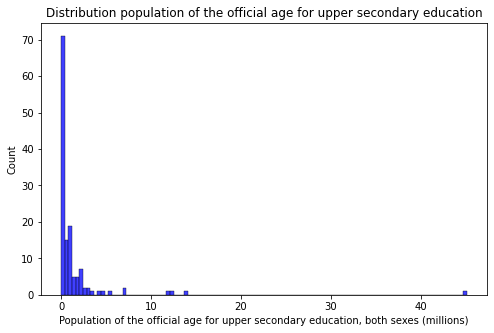

In [104]:
pop_c = past_data_countries.reset_index(0, drop=True) # Enlève le code des pays

# Sélectionne l'année 2016, enlève l'index lié à l'année, sélectionne la colonne 'Population...'
pop_c = pop_c.loc(axis=0)[:, 2016].reset_index(1, drop=True)['Population of the official age for upper secondary education, both sexes (number)']
pop_c = pop_c.dropna() # Enlève les NaN

import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(pop_c, ax=ax, kde=False, color="b")
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([int(x/10**6) for x in ticks_loc])
ax.set_title("Distribution population of the official age for upper secondary education")
ax.set_xlabel('Population of the official age for upper secondary education, both sexes (millions)')
plt.show()

La quasi-totalité des pays ont entre 0 et 10 000 000 habitants en âge d'aller au lycée. Regardons la distribution de plus près, en retirant les outliers (càd ici les pays dont la population de lycéens dépasse 10 000 000 hab.)

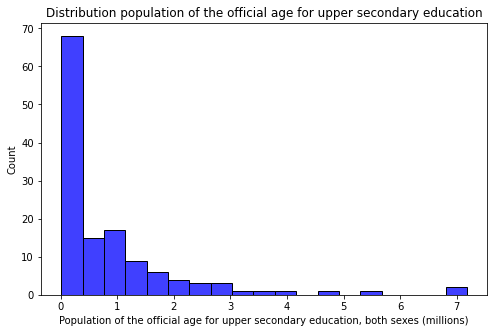

In [136]:
pop_c = pop_c[pop_c < 10e6]
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(pop_c, ax=ax, kde=False, color="b")
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([int(x/10**6) for x in ticks_loc])
ax.set_title("Distribution population of the official age for upper secondary education")
ax.set_xlabel('Population of the official age for upper secondary education, both sexes (millions)')
plt.show()

### V.2.3 Nettoyage par le taux de remplissage

On a vu que la table EdStatsData est "sparse": on va maintenant filtrer une deuxième fois en utilisant le taux de remplissage: des pays, et des indicateurs. Commençons par se donner une idée plus précise des divers taux de remplissage

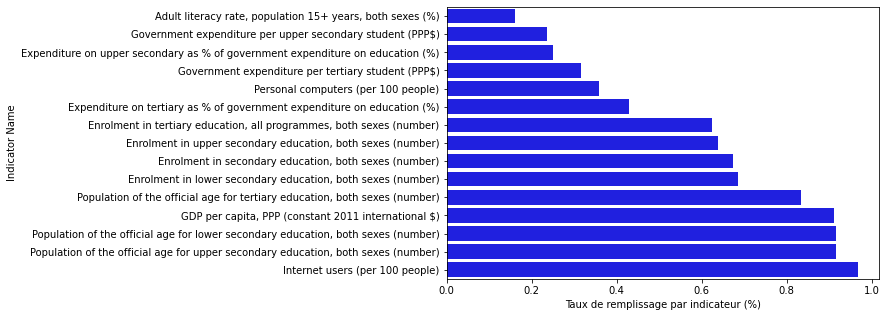

In [234]:
# taux de remplissage par indicateur
df = past_data_countries.copy()
tr = df.notna().sum()/df.shape[0]
width = tr.sort_values()
y= width.index
plt.figure(figsize=(15, 5))
sns.barplot(x=width, y=y, color="b")
plt.xlabel('Taux de remplissage par indicateur (%)')
plt.gcf().subplots_adjust(left=0.5)
plt.savefig('./livrables/images/tr_indicateurs.png', dpi=300)
plt.show()

Grande variabilité des taux de remplissage d'un indicateur à l'autre. Regardons maintenant les taux de remplissage par indicateur, et par pays.

In [107]:
# taux de remplissage par pays, par indicateur
taux_remplissage = df.notna().groupby(['Country Code', 'Country Name']).sum()/17
taux_remplissage.head()

,Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in lower secondary education, both sexes (number)","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Expenditure on tertiary as % of government expenditure on education (%),Expenditure on upper secondary as % of government expenditure on education (%),"GDP per capita, PPP (constant 2011 international $)",Government expenditure per tertiary student (PPP$),Government expenditure per upper secondary student (PPP$),Internet users (per 100 people),Personal computers (per 100 people),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)"
Country Code,Country Name,,,,,,,,,,,,,,,
AFG,Afghanistan,0.058824,0.764706,0.823529,0.294118,0.764706,0.352941,0.000000,0.882353,0.000000,0.000000,0.941176,0.117647,0.941176,0.941176,0.941176
AGO,Angola,0.117647,0.411765,0.411765,0.470588,0.529412,0.117647,0.058824,1.000000,0.000000,0.000000,1.000000,0.294118,1.000000,0.882353,1.000000
ALB,Albania,0.235294,0.882353,0.941176,0.941176,0.882353,0.058824,0.058824,1.000000,0.058824,0.058824,1.000000,0.529412,1.000000,0.941176,1.000000
AND,Andorra,0.117647,0.764706,0.823529,0.588235,0.764706,0.647059,0.411765,0.000000,0.000000,0.000000,0.941176,0.000000,0.000000,0.000000,0.000000
ARE,United Arab Emirates,0.058824,0.823529,0.000000,0.529412,0.823529,0.000000,0.000000,1.000000,0.000000,0.117647,1.000000,0.411765,0.941176,0.411765,0.941176


Affichons des exemples de taux de remplissage, pour trois indicateurs:
- Internet users
- Enrolment in tertiary education
- Adult literacy rate

Pour des raison de lisibilité, on n'affichera ces graphiques que pour un sous ensemble de pays sélectionnés aléatoirement.

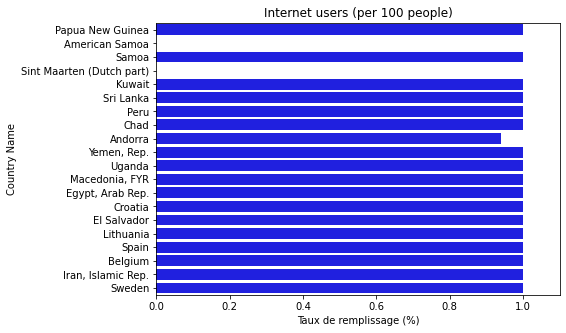

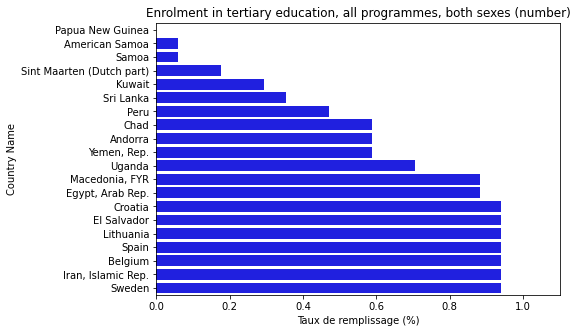

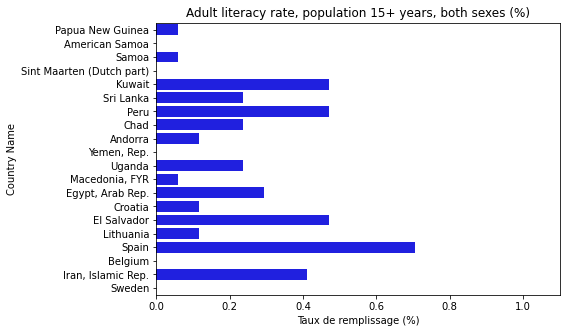

In [233]:
ind = ['Internet users (per 100 people)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Adult literacy rate, population 15+ years, both sexes (%)']

tr = taux_remplissage.copy()
tr = tr.reset_index(level=0, drop=True)

# On sélectionne aléatoirement 20 pays
index = tr.sample(20).index

#fig, axs = plt.subplots(1, len(ind), figsize=(15, 8), sharey=True)

y = tr.loc[index, ind[1]].sort_values().index

for i, c in enumerate(ind):
    plt.figure(figsize=(8, 5))
    width = tr.loc[y, c]
    sns.barplot(x=width, y=y, color="b")
    plt.title(c, fontsize=12)
    plt.xlabel('Taux de remplissage (%)')
    plt.xlim([0, 1.1])
    plt.gcf().subplots_adjust(left=0.2, right=0.9)
    #plt.savefig('./livrables/images/'+c+'.png')
    plt.show()

Les taux de remplissage pour un pays donné sont assez variables d'un indicateur à l'autre. Regardons le taux de remplissage moyen par pays.

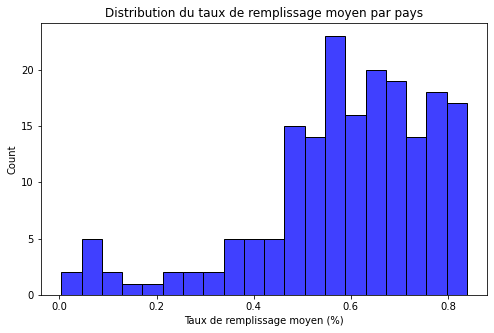

In [109]:
taux_remplissage['taux_moyen'] = taux_remplissage.mean(axis=1)
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(taux_remplissage['taux_moyen'], ax=ax, bins=20, kde=False, color="b")
#ticks_loc = ax.get_xticks()
#ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#ax.set_xticklabels("")
ax.set_title("Distribution du taux de remplissage moyen par pays")
ax.set_xlabel('Taux de remplissage moyen (%)')
plt.show()

Deux remarques:
- Grande dispersion des taux de remplissage.
- Filtrer sur les taux de remplissage moyen comporte le risque d'éliminer des pays qui pourrait avoir de bonnes données regroupées sur un très petit nombre d'années: comme le taux de remplissage moyen est une valeur qui agrège les données de chaque année, puis de chaque indicateur, on ne peut pas savoir seulement grâce à cette mesure si il existe pour un indicateur donné une "bonne" année, c'est-à-dire une année pour laquelle le taux de remplissage est satisfaisant, même si par ailleurs beaucoup de valeurs, correspondants à d'autres années, sont manquantes. On peut donc regarder comment se répartissent les taux de remplissage par indicateur et par année.

On peut même aller plus loin , car on cherche le meilleur compromis entre taux de remplissage élevé et des données les plus récentes possible. On va donc regarder pour chaque pays la dernière année pour laquelle une donnée est renseignée, et on va ensuite compter le nombre de pays pour lesquels la dernière année correspond à l'année X, le nombre de pays dont la dernière valeur est donnée pour l'année Y etc. pour chaque indicateur. Cela nous permettra de définir une "année de référence" pour chaque indicateur: en effet, l'année de référence sera alors l'année pour laquelle le taux de remplissage est maximum.

In [110]:
# On ne va conserver que la dernière ligne non nulle pour chaque pays
countries = past_data_countries.index.get_level_values(0).unique()
columns = past_data_countries.columns
year_lastentry = np.empty((len(countries), len(columns)))
year_lastentry[:] = np.nan

for i, c in enumerate(countries):
    for j, col in enumerate(columns):
        try:
            year_lastentry[i, j] = past_data_countries.loc(axis=0)[c, :, :][col].dropna().index.get_level_values(2)[-1]# Afficher les années en int
        except:
            pass
            
year_lastentry = pd.DataFrame(year_lastentry, index=countries, columns=columns)
pd.set_option("precision", 0)
year_lastentry.head() #les années

Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in lower secondary education, both sexes (number)","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Expenditure on tertiary as % of government expenditure on education (%),Expenditure on upper secondary as % of government expenditure on education (%),"GDP per capita, PPP (constant 2011 international $)",Government expenditure per tertiary student (PPP$),Government expenditure per upper secondary student (PPP$),Internet users (per 100 people),Personal computers (per 100 people),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)"
Country Code,,,,,,,,,,,,,,,
AFG,2011,2014,2015,2014,2014,2015,NaN,2016,NaN,NaN,2016,2006,2015,2015,2015
AGO,2014,2011,2011,2015,2011,2006,2005,2016,NaN,NaN,2016,2006,2016,2015,2016
ALB,2012,2014,2015,2015,2014,2013,2013,2016,2013,2013,2016,2008,2016,2015,2016
AND,2016,2014,2015,2015,2014,2015,2014,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN
ARE,2005,2014,NaN,2015,2014,NaN,NaN,2016,NaN,2012,2016,2006,2015,2006,2015


In [229]:
# Affichons les annés de référence pour chaque indicateur:
import pprint
pprint.pprint(annee_ref)

{'Adult literacy rate, population 15+ years, both sexes (%)': 2015,
 'Enrolment in lower secondary education, both sexes (number)': 2014,
 'Enrolment in secondary education, both sexes (number)': 2015,
 'Enrolment in tertiary education, all programmes, both sexes (number)': 2015,
 'Enrolment in upper secondary education, both sexes (number)': 2014,
 'Expenditure on tertiary as % of government expenditure on education (%)': 2014,
 'Expenditure on upper secondary as % of government expenditure on education (%)': 2013,
 'GDP per capita, PPP (constant 2011 international $)': 2016,
 'Government expenditure per tertiary student (PPP$)': 2013,
 'Government expenditure per upper secondary student (PPP$)': 2013,
 'Internet users (per 100 people)': 2016,
 'Personal computers (per 100 people)': 2005,
 'Population of the official age for lower secondary education, both sexes (number)': 2016,
 'Population of the official age for tertiary education, both sexes (number)': 2015,
 'Population of the of

Regardons, par curiosité et pour l'exemple, quelles sont les dernières années de remplissage pour la France

In [112]:
year_lastentry.loc['FRA']

Indicator Name
Adult literacy rate, population 15+ years, both sexes (%)                             NaN
Enrolment in lower secondary education, both sexes (number)                          2014
Enrolment in secondary education, both sexes (number)                                2014
Enrolment in tertiary education, all programmes, both sexes (number)                 2014
Enrolment in upper secondary education, both sexes (number)                          2014
Expenditure on tertiary as % of government expenditure on education (%)              2013
Expenditure on upper secondary as % of government expenditure on education (%)       2012
GDP per capita, PPP (constant 2011 international $)                                  2016
Government expenditure per tertiary student (PPP$)                                   2012
Government expenditure per upper secondary student (PPP$)                            2012
Internet users (per 100 people)                                                      

Affichons les résultats sous forme de diagrammes en barres

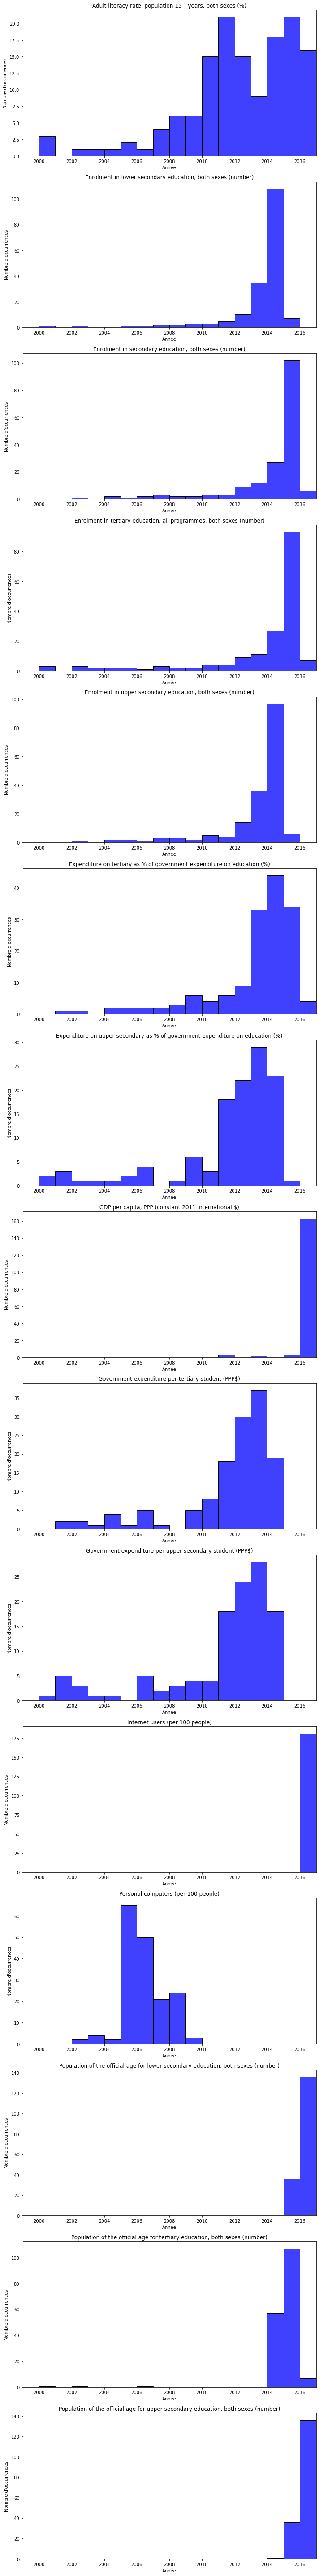

In [227]:
pd.reset_option("precision")

# On stocke les années de référence dans le dictionnaire annee_ref qui sera utile pour la suite
#annee_ref[c] = int(year_lastentry[c].value_counts().idxmax()) # int() pour avoir les années au format entier et non  2011.0 par exemple
cols = year_lastentry.columns
annee_ref = {c:int(year_lastentry[c].value_counts().idxmax()) for c in cols}
bins = np.arange(2000, 2018)

# Diagrammes en bâtons pour chaque indicateur
fig, axs = plt.subplots(len(cols), 1, figsize=(10, 80))

for i, c in enumerate(cols):
    sns.histplot(year_lastentry[c], ax=axs[i], bins=bins, color="b")
    axs[i].set_title(c)
    axs[i].set_xlabel('Année')
    axs[i].set_ylabel('Nombre d\'occurrences')
    axs[i].set_xlim([1999, 2017])
fig.tight_layout()

On peut remarquer deux choses:
- Les dernières valeurs renseignées pour chaque indicateur sont inégalement réparties dans le temps
- Les indicateurs sont très inégalement renseignés: certains ont des valeurs pour l'année de référence sur quelques dizaines de pays (20-30), d'autres sur plus de cent.

Maintenant que nous avons sélectionné les valeurs pour chaque année de référence, pour chaque indicateur et chaque pays, on va regarder si les indicateurs choisis sont corrélés entre eux, avec peut-être une possibilité de filtrer les indicateurs qu'on souhaite conserver pour l'analyse finale

### V.2.4 Sélection d'indicateurs grâce à leurs corrélations

**Y'a-t-il des corrélation entre les indicateurs retenus?**
Cela permettrait d'éliminer certains indicateurs et rendre l'analyse plus lisible, et ne retenir que les meilleurs indicateurs dans chaque catégorie (Topic)

In [115]:
# On va avoir besoin de réécrire légèrement nos indicateurs pour rendre les carte de corrélation lisibles
labels = past_data_countries.columns
new_labels = []
for l in labels:
    if len(l.split(',')) > 1:
        new_labels.append(l.split(',')[0])
    elif len(l.split('%')) > 1:
        new_labels.append(l.split('%')[0][:-3])
    elif len(l.split('(')) > 1:
        new_labels.append(l.split('(')[0])
print(new_labels)

['Adult literacy rate', 'Enrolment in lower secondary education', 'Enrolment in secondary education', 'Enrolment in tertiary education', 'Enrolment in upper secondary education', 'Expenditure on tertiary ', 'Expenditure on upper secondary ', 'GDP per capita', 'Government expenditure per tertiary student ', 'Government expenditure per upper secondary student ', 'Internet users ', 'Personal computers ', 'Population of the official age for lower secondary education', 'Population of the official age for tertiary education', 'Population of the official age for upper secondary education']


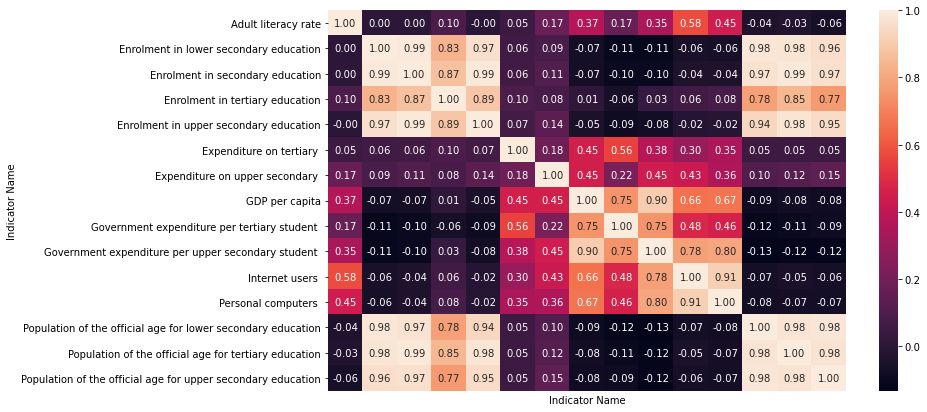

In [253]:
plt.figure(figsize=(15, 7))
sns.heatmap(past_data_countries.corr(), annot=True, xticklabels=False, yticklabels=new_labels, fmt=".2f")
plt.gcf().subplots_adjust(left=0.4, right=1)
plt.savefig('./livrables/images/corr_all.png', dpi=300)
plt.show()

On voit qu'en effet, un certain nombre de ces indicateurs sont fortement corrélés. On va donc essayer de restreindre le plus possible le nombre d'indicateurs retenus, en utilisant ces taux de corrélation. Idéalement, on souhaiterait garder un indicateur/topic, voire deux si ils sont réellement complémentaires (non redondants). Le critère de sélection va reposer successivement sur le nombre de pays renseignés pour l'indicateur considéré et le taux de corrélation entre cet indicateurs et les autres: on souhaite en effet garder les indicateurs les mieux renseignés.

In [254]:
# Sélection des indicateurs

cols = past_data_countries.columns
corr = {}
selected = []

# On commence par rassembler les indicateurs qu'on accompagne du nombre de pays représentés pour chacun d'entre eux
for i, c in enumerate(cols):
    n_pays = past_data_countries.loc(axis=0)[:, :, annee_ref[c]][c].notna().sum()
    corr[c] = (c, n_pays) 
sorted_ind = sorted(corr, reverse=True)

# Pour chaque paire (indicateur, nb_pays), on sélectionne l'ensemble des indicateurs corrélés à plus de 90%
# et on choisit celui renseigné par le maximum de pays
for si in sorted_ind:
    # Sélection de l'ensemble des indicateurs corrélés à plus de 90%
    corr_series = past_data_countries.corr()[si].sort_values(ascending=False)
    corr_series = corr_series[corr_series > 0.9]
    
    
    # Sélection de l'indicateur (parmi ceux corrélés à plus de 90%) renseigné par un maximum de pays
    ind_list = []
    for i in corr_series.index:
        try:
            ind_list.append(corr[i])
        except:
            pass    
    candidate = sorted(ind_list, key=lambda x: x[1], reverse=True)[0]
    
    # Ajout du candidat à la liste des candidats sélectionnés
    if candidate[0] not in selected:
        selected += [candidate[0]]

print(selected)

['Population of the official age for upper secondary education, both sexes (number)', 'Population of the official age for lower secondary education, both sexes (number)', 'Internet users (per 100 people)', 'GDP per capita, PPP (constant 2011 international $)', 'Government expenditure per tertiary student (PPP$)', 'Expenditure on upper secondary as % of government expenditure on education (%)', 'Expenditure on tertiary as % of government expenditure on education (%)', 'Enrolment in tertiary education, all programmes, both sexes (number)', 'Adult literacy rate, population 15+ years, both sexes (%)']


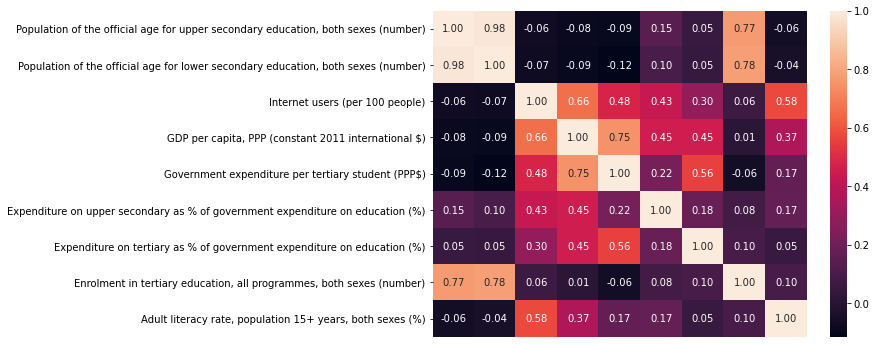

In [255]:
plt.figure(figsize=(13, 6))
sns.heatmap(past_data_countries[selected].corr(), annot=True, xticklabels=False, fmt=".2f")
plt.xlabel("")
plt.ylabel("")
plt.gcf().subplots_adjust(left=0.5, right=1)
plt.savefig('./livrables/images/corr_1.png', dpi=300)
plt.show()

On a réussit à se débarasser d'un certain nombre d'indicateurs. D'après la carte des corrélations, il reste néanmoins deux indicateurs très corrélés:
- Population of the official age for lower secondary education, both sexes (number)
- Population of the official age for upper secondary education, both sexes (number)

On décide de se débarasser du premier (de façon un peu arbitraire), car l'autre est plus proche de ce qu'on souhaite mesurer, et que les deux sont évalués sur le même nombre de pays par ailleurs

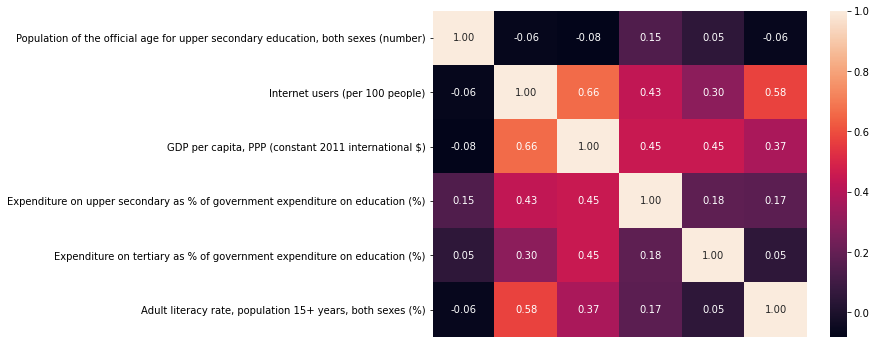

In [259]:
#selected.remove('Population of the official age for lower secondary education, both sexes (number)')

plt.figure(figsize=(13, 6))
sns.heatmap(past_data_countries[selected].corr(), annot=True, xticklabels=False, fmt=".2f")
plt.xlabel("")
plt.ylabel("")
plt.gcf().subplots_adjust(left=0.5, right=1)
plt.savefig('./livrables/images/corr_2.png', dpi=300)
plt.show()

L'indicateur Government expenditure per tertiary student (PPP) associé au même topic que deux autres indicateurs liés aux dépenses ('Expenditures'). Par ailleurs, il possède une corrélation assez élevée avec 'GDP per capita, PPP (constant 2011 international)'. L'indicateur 'Enrolment in tertiary' est lui aussi fortement corrélé avec "Population of the official age for upper secondary..." et, sans appartenir au même topic, est en quelque sorte redondant. On élimine ces deux indicateurs.

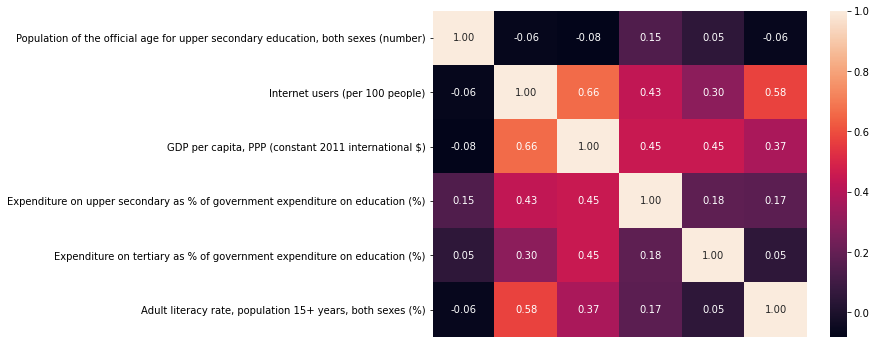

In [260]:
#selected.remove('Government expenditure per tertiary student (PPP$)')
#selected.remove('Enrolment in tertiary education, all programmes, both sexes (number)')
plt.figure(figsize=(13, 6))
sns.heatmap(past_data_countries[selected].corr(), annot=True, xticklabels=False, fmt=".2f")
plt.xlabel("")
plt.ylabel("")
plt.gcf().subplots_adjust(left=0.5, right=1)
plt.savefig('./livrables/images/corr_3.png', dpi=300)
plt.show()

Il nous reste donc 6 indicateurs: 
- enrolment/population (1)
- expenditures (2)
- GDP (1)
- literacy (1)
- Internet (1)

# VI Visualisation et analyse de données

## VI.1 Statistiques sur les pays

Commençons par regarder les distributions statistiques de chaque indicateur retenu sur les pays

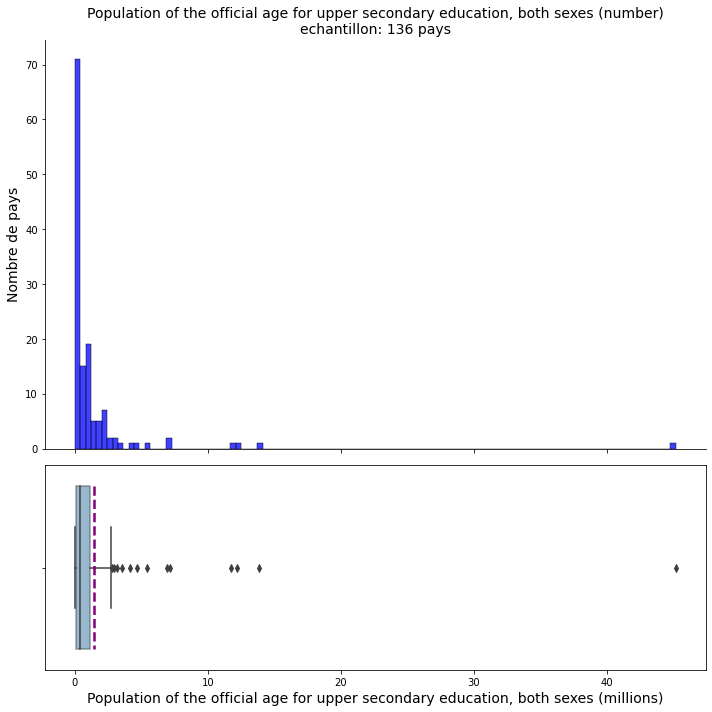

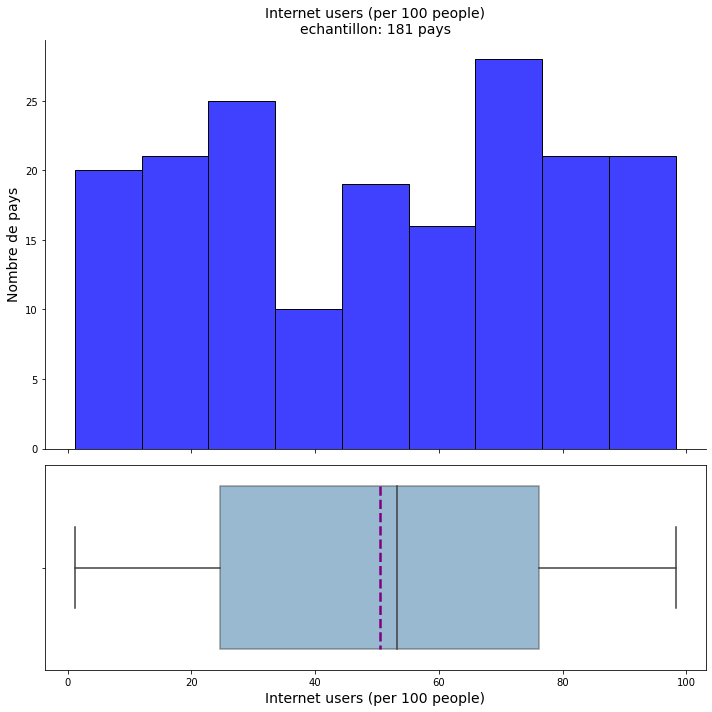

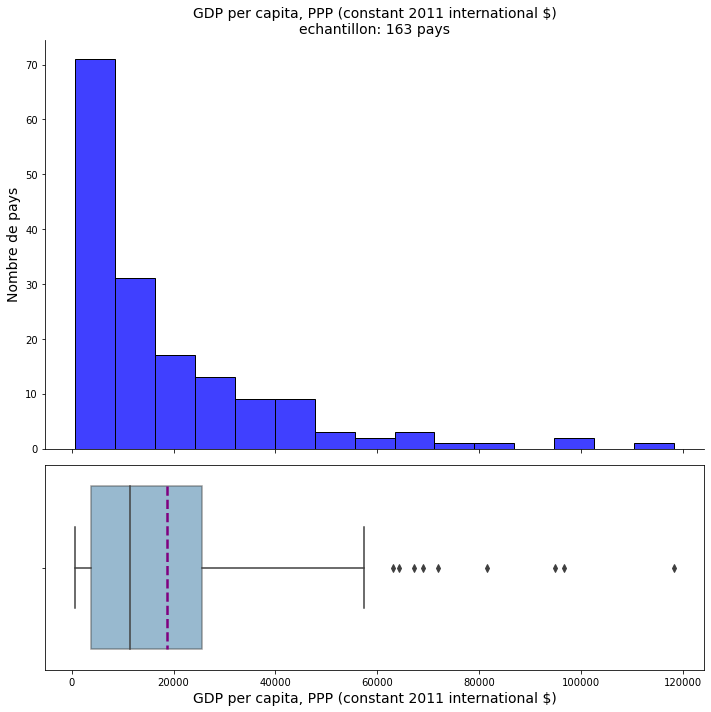

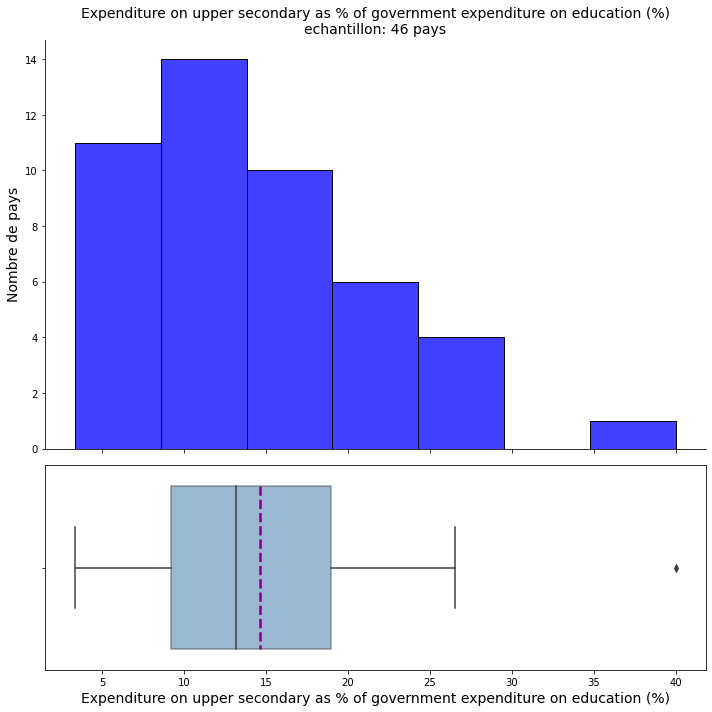

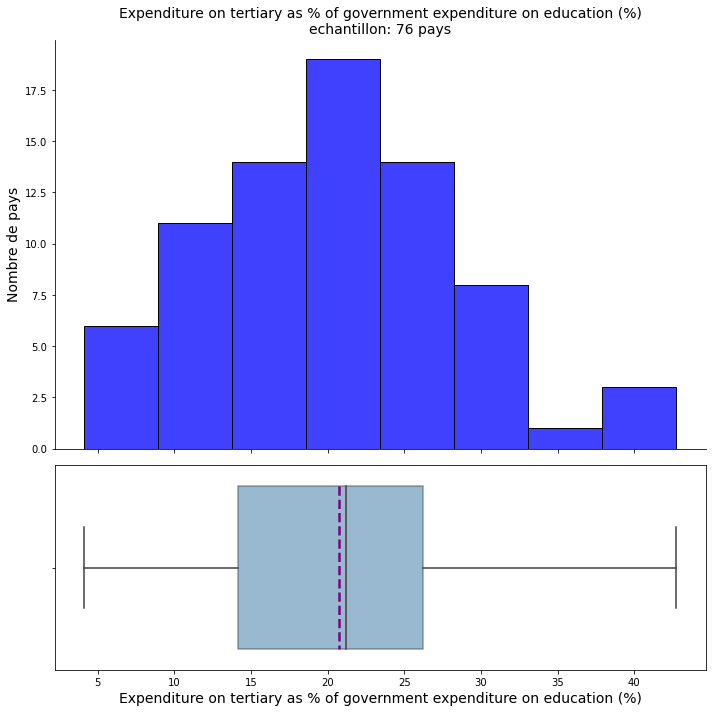

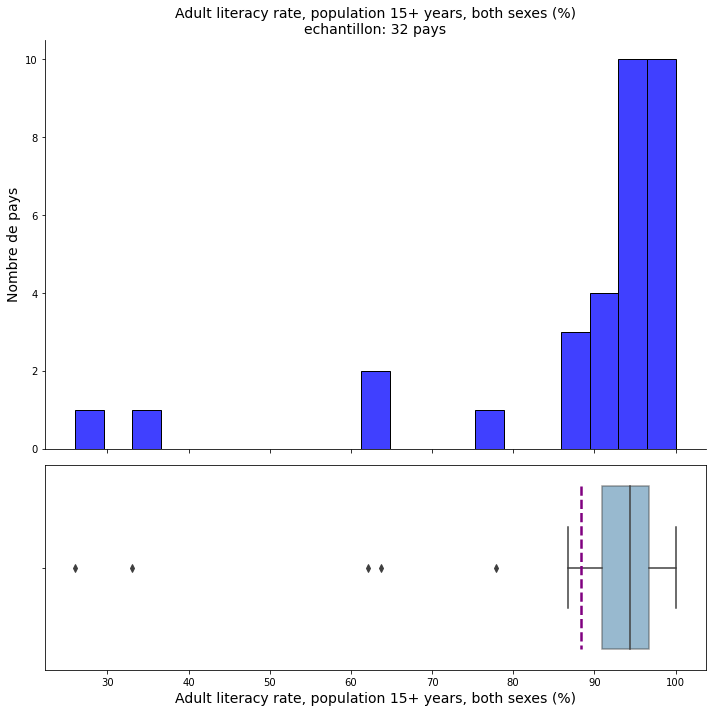

In [276]:
cols = selected
df = past_data_countries.copy()
df = df.reset_index(level=1, drop=True)

for i, c in enumerate(cols):
    label = c.split(' ')[-1]
    
    # l'echantillon de la distribution. Attention, il s'agit des valeurs pour l'année de référence, mais 
    # l'échantillon comprend également les pays pour lesquels la dernière valeur renseignée peut être plus tardive
    # Ceci explique que les échantillons sont en général plus grand que le nombre de valeurs indiquées dans les
    # diagrammes en bâton ci-dessus.
    nb_pays = df.loc(axis=0)[:, annee_ref[c]][c].notna().sum() 
    meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
    fig,(ax,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(10,10),gridspec_kw={'height_ratios':[2,1]})
    
    # Plot les histograms des indicateurs
    sns.histplot(df.loc(axis=0)[:, annee_ref[c]][c].dropna(), ax=ax,
                 kde=False,
                 color="b",
                )
    ax.set_xlabel("")
    ax.set_ylabel("Nombre de pays", fontsize=14)
    ax.set_title(c+'\nechantillon: {} pays'.format(nb_pays), fontsize=14);
    
        
    # Trace un boxplot aligné
    sns.boxplot(data=df.loc(axis=0)[:, annee_ref[c]],
                #y="sex",
                x=c,
                orient="h",
                ax=ax2,
                showmeans=True,
                meanline=True,
                meanprops=meanlineprops
               )
    plt.setp(ax2.artists, alpha=.5)
    if c == 'Population of the official age for upper secondary education, both sexes (number)':
        ticks_loc = ax.get_xticks()
        ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        ax.set_xticklabels([int(x/10**6) for x in ticks_loc], fontsize=14)
        ax2.set_xlabel('Population of the official age for upper secondary education, both sexes (millions)', fontsize=14)
    else:
        ax2.set_xlabel(c, fontsize=14)
        
    sns.despine(ax=ax)
    #plt.gcf().subplots_adjust(left=0.5, right=1)
    plt.savefig('./livrables/images/stats_country_'+str(i), dpi=300)
    fig.tight_layout()    
    plt.show()

La distribution sur la population est très ramassée sur la gauche, à cause de quelques tres grands pays (Chine, Inde notamment). On va donc revisualiser cette distribution en écartant ces outliers

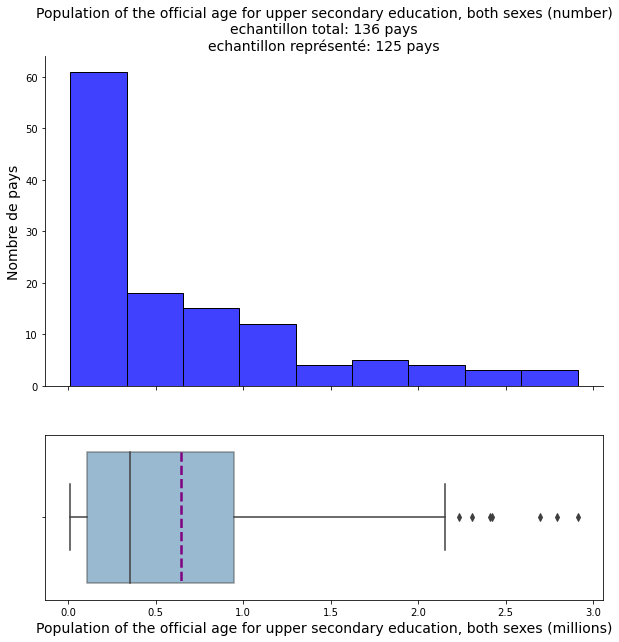

In [277]:
fig,(ax,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(10,10),gridspec_kw={'height_ratios':[2,1]})
c = 'Population of the official age for upper secondary education, both sexes (number)'
max_pop_display = 3e6


# Définit le seuil de population pour le tracé de l'histogramme et du diagramme en boîte
data = df.loc(axis=0)[:, annee_ref[c]]
nb_total = data[c].notna().sum()
d = data[data[c] < max_pop_display]
nb_pays = d[c].notna().sum()

# Plot les histograms des indicateurs
sns.histplot(d[c], ax=ax,
             kde=False,
             color="b",
            )
ax.set_xlabel("")
ax.set_ylabel("Nombre de pays", fontsize=14)
ax.set_title(c+'\nechantillon total: {} pays'.format(nb_total)+
             '\nechantillon représenté: {} pays'.format(nb_pays), fontsize=14)

    
# Trace un boxplot aligné
sns.boxplot(data=d,
            #y="sex",
            x=c,
            orient="h",
            ax=ax2,
            showmeans=True,
            meanline=True,
            meanprops=meanlineprops
           )
plt.setp(ax2.artists, alpha=.5)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([x/10**6 for x in ticks_loc], fontsize=14)
ax2.set_xlabel('Population of the official age for upper secondary education, both sexes (millions)', fontsize=14)

sns.despine(ax=ax)        
#plt.gcf().subplots_adjust(left=0.5, right=1)
plt.savefig('./livrables/images/stats_country_0_1', dpi=300)


On peut regarder:
- la répartition des différentes régions du monde dans chaque indicateur
- la répartition des différents groupes de revenus dans chaque indicateur
- les corrélations entre indicateurs

Enfin, on déterminera un score d'attractivité pour les pays en vue d'un développement commercial

## VI.2 Statistiques sur les regions

On cherche ici à visualiser les distributions des mêmes indicateurs, mais cette fois en regardant au niveau des blocs:
- blocs "économiques", définis par le niveau de revenu des pays
- blocs "géographiques", ou régionaux

Cela permettra de se donner une idée de la dispersion des indicateurs retenus entre chacun de ces blocs.

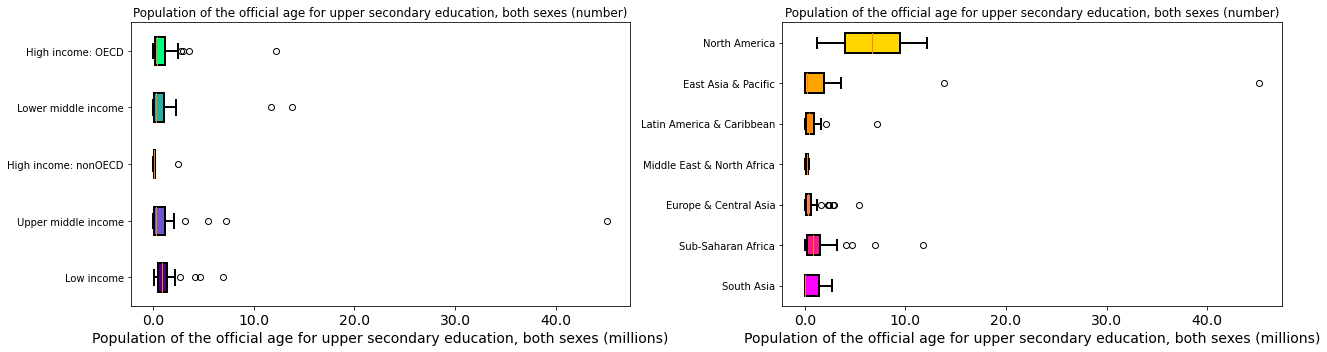

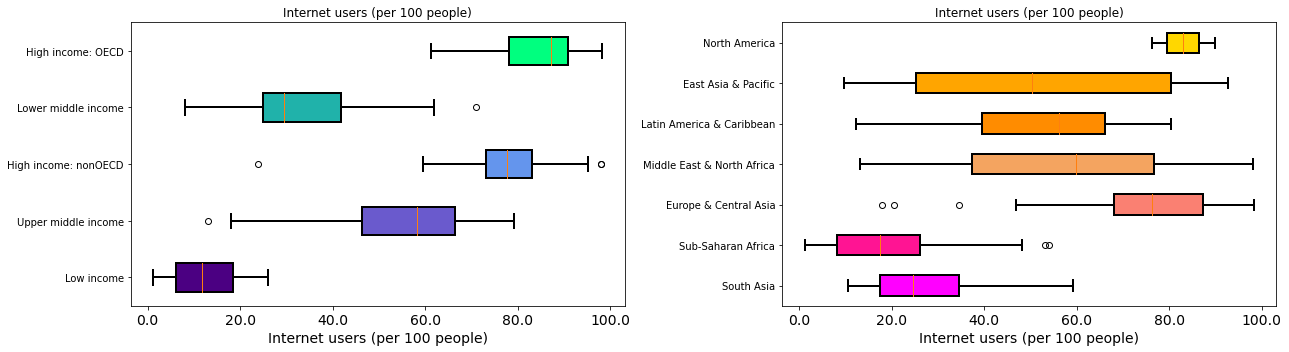

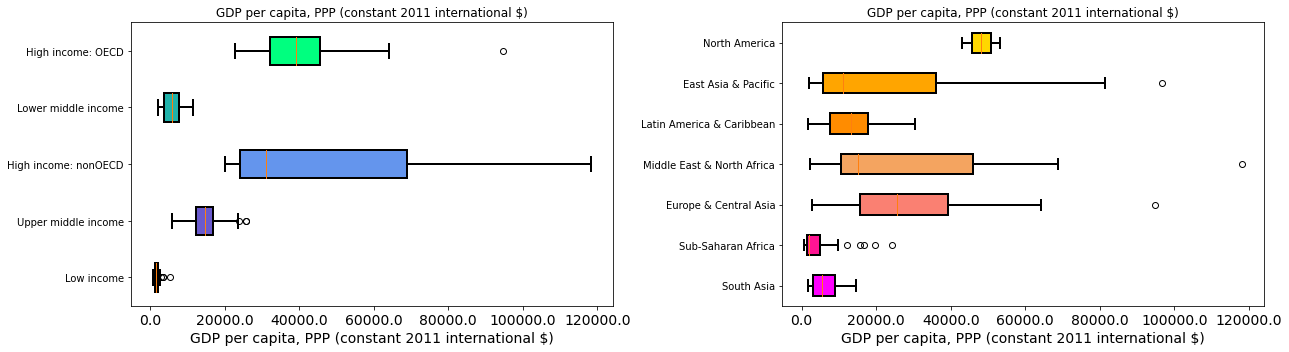

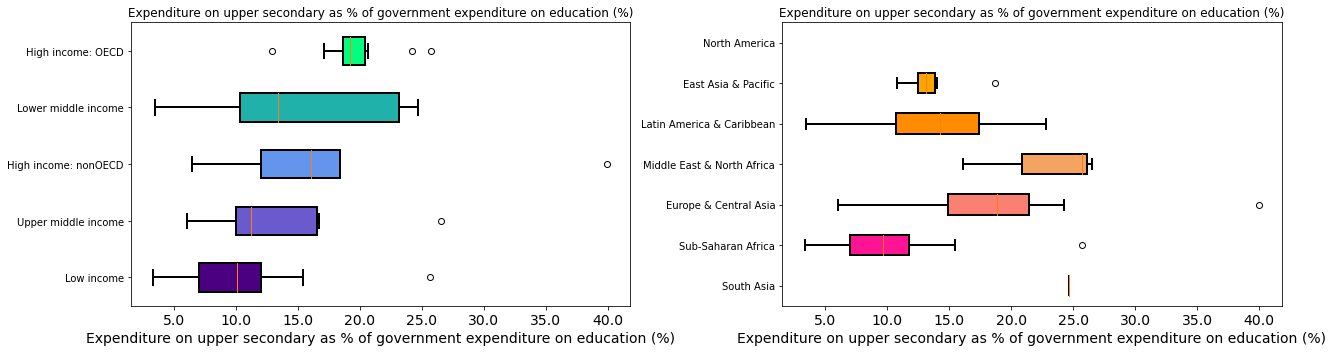

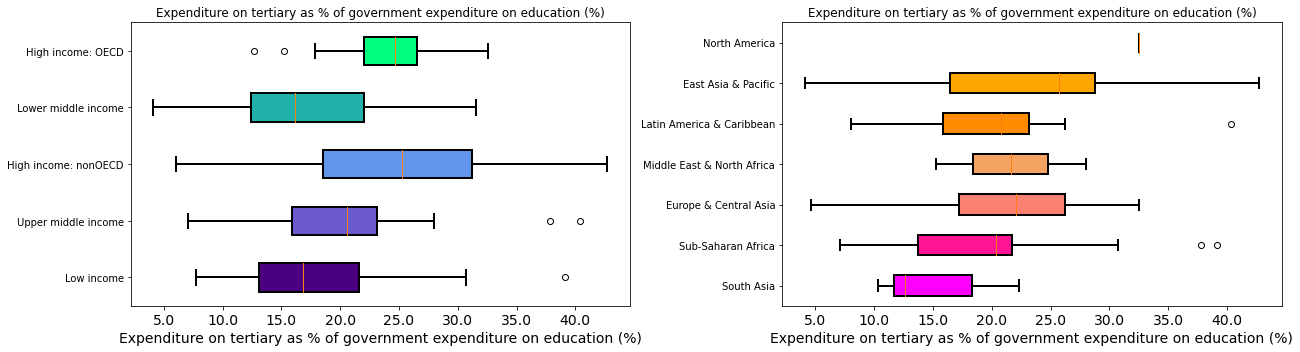

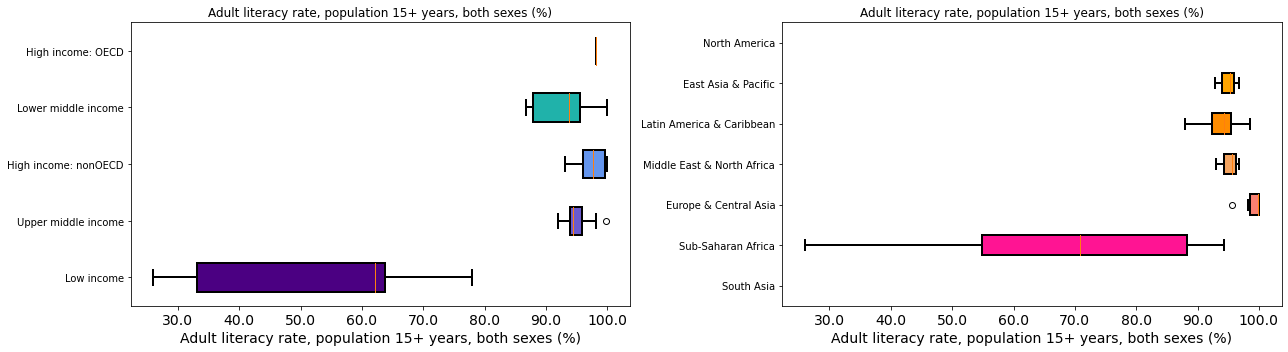

In [279]:
# 1. On commence par créer un nouveau dataframe ne contenant que les données aux années de référence
Index = past_data_countries.index.get_level_values(0).unique()
cols = selected
data = np.empty([len(Index), len(cols)])
data[:] = np.nan

for j,c in enumerate(cols):
    for i, ct in enumerate(Index):
        cname = past_data_countries.loc[ct].index.get_level_values(0).unique().values[0]
        annee_ref = int(year_lastentry[c].value_counts().idxmax())
        try:
            data[i,j] = past_data_countries.loc(axis=0)[ct, cname, annee_ref][c]
        except:
            pass
df = pd.DataFrame(data, index=Index, columns=cols)


# 2. On ajoute les colonnes 'Income Group' et 'Region'
Index = df.index.get_level_values(0).unique()
df['Income Group'] = df_countries[df_countries['Country Code'].isin(Index)]['Income Group'].values
df['Region'] = df_countries[df_countries['Country Code'].isin(Index)]['Region'].values

# 3. On crée les listes income_groups et region_groups
income_groups = df['Income Group'].unique()
region_groups = df['Region'].unique()

# 4. On trace les distributions: sur les income_groups et les régions
boxprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)
flierprops = dict(linewidth=2)
igcolors = ['indigo', 'slateblue', 'cornflowerblue', 'lightseagreen', 'springgreen']
rgcolors = ['magenta', 'deeppink', 'salmon', 'sandybrown', 'darkorange', 'orange', 'gold']
colors = [igcolors, rgcolors]

for k, c in enumerate(df.columns[:-2]):
    iggroupes = []
    rggroupes = []
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    bplots = []
    
    for ig in income_groups:
        iggroupes.append(df[df['Income Group']==ig][c].dropna())
       
    for rg in region_groups:
        rggroupes.append(df[df['Region']==rg][c].dropna())
        
    bplots.append(ax1.boxplot([ig for ig in iggroupes], 
                                labels=income_groups, 
                                vert=False, 
                                patch_artist = True, 
                                showfliers=True,
                                boxprops=boxprops,
                                whiskerprops=whiskerprops, 
                                capprops=capprops))
    ax1.set_title(c)
    
    bplots.append(ax2.boxplot([rg for rg in rggroupes], 
                                labels=region_groups, 
                                vert=False, 
                                patch_artist = True, 
                                showfliers=True,
                                boxprops=boxprops,
                                whiskerprops=whiskerprops, 
                                capprops=capprops))
    ax2.set_title(c)
    
    for ax in (ax1, ax2):
        if c == 'Population of the official age for upper secondary education, both sexes (number)':
            ticks_loc = ax.get_xticks()
            ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            ax.set_xticklabels([(x/10**6) for x in ticks_loc], fontsize=14)
            ax.set_xlabel('Population of the official age for upper secondary education, both sexes (millions)', fontsize=14)
        else:
            ticks_loc = ax.get_xticks()
            ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            ax.set_xticklabels(ticks_loc, fontsize=14)
            ax.set_xlabel(c, fontsize=14)
        
        
    for i, bplot in enumerate(bplots):
        for patch, color in zip(bplot['boxes'], colors[i]):
            patch.set_facecolor(color)
            
    plt.gcf().subplots_adjust(wspace=0.005)
    fig.tight_layout()
    plt.savefig('./livrables/images/stats_regions_'+str(k), dpi=300)
    plt.show()

## VI.3 Scoring

Pour réaliser un scoring et ainsi déterminer les meilleurs candidats pour un développement commercial, on va procéder de la façon suivante:
- on commence par normaliser les valeurs pour chaque indicateurs. Deux méthodes de normalisation sont utilisées: une première méthode, qui consiste à rescaler toutes les valeurs en effectuant sur chaque variable l'opération suivante:  
$\Large x\mapsto\frac{x-\bar{x}}{\sigma_{x}}$ 
en notant $\bar{x}$ la valeur moyenne et $\sigma_{x}$ l'écart type de l'indicateur considéré  
et une deuxième méthode qui consiste à rescaler de la manière suivante:  
$\Large x\mapsto\frac{x-min}{max - min}$  
où $min$ et $max$ désignent respectivement les valeurs minimum et maximum de l'indicateur considéré.

- On somme, pour chaque pays, toutes les valeurs ce qui donne une valeur par indicateur. Dans la mesure où pour tous les indicateurs choisis on suppose que "le plus, c'est le mieux", les meilleurs pays seront ceux dont le score sera le plus élevé.

En vue du scoring, on va commencer par remplacer tous les NaN par les valeurs correspondant à la valeur moyenne de l'indicateur pour l'Income Group auquel appartient le pays concerné. On choisit l'Income Group comme critère plutôt que la région (géographique), car cette catégorisation semble plus pertinente que le bloc géographique auquel appartient le pays: un bloc géographique est susceptible de contenir des valeurs plus dispersées qu'un income group qui repose uniquement sur des critères tels que le PIB par exemple.

On commence par calculer ces valeurs moyennes et les ranger dans deux dataframes:

In [124]:
# Pour remplir les valeurs manquantes

# Les valeurs moyennes de chaque indicateur pour chaque Income Group
vmoy_ig = df.groupby('Income Group').mean()

# Les valeurs moyennes de chaque indicateur pour chaque région
#vmoy_rg = df.groupby('Region').mean()

On crée les nouveaux DataFrame, dont les valeurs manquantes sont remplies comme indiqué ci-dessus

In [125]:
# On commence par remplacer les valeurs manquantes par la moyenne pour l'indicateur considéré du "Income Group"
# auquel appartient le pays
filledval_ig = df.copy()

for c in filledval_ig.columns[:-2]:
    for ind in filledval_ig.index:
        if np.isnan(filledval_ig.loc[ind, c]):
            filledval_ig.loc[ind, c] = vmoy_ig.loc[df_countries.loc[df_countries['Country Code']==ind, 'Income Group'].unique()[0]][c]

## Puis on fait la même chose, cette fois en considérant la région à laquelle appartient le pays
#filledval_rg = df.copy()
#for c in filledval_rg.columns[:-2]:
#    for ind in filledval_rg.index:
#        if np.isnan(filledval_rg.loc[ind, c]):
#            try:
#                filledval_rg.loc[ind, c] = vmoy_rg.loc[df_countries.loc[df_countries['Country Code']==ind, 'Region'].unique()[0]][c]
#            except:
#                pass

In [126]:
filledval_ig.head()

,"Population of the official age for upper secondary education, both sexes (number)",Internet users (per 100 people),"GDP per capita, PPP (constant 2011 international $)",Expenditure on upper secondary as % of government expenditure on education (%),Expenditure on tertiary as % of government expenditure on education (%),"Adult literacy rate, population 15+ years, both sexes (%)",Income Group,Region
Country Code,,,,,,,,
AFG,1.342092e+06,10.595726,1739.583177,10.552183,12.411280,52.569654,Low income,South Asia
AGO,1.736603e+06,13.000000,5984.640422,13.842964,21.042466,94.946256,Upper middle income,Sub-Saharan Africa
ALB,1.497450e+05,66.363445,11359.099157,6.042300,21.042466,94.946256,Upper middle income,Europe & Central Asia
AND,2.806221e+05,97.930637,48981.227095,6.440780,6.075540,100.000000,High income: nonOECD,Europe & Central Asia
ARE,2.806221e+05,90.600007,67133.065519,18.581196,24.804282,97.345570,High income: nonOECD,Middle East & North Africa


In [127]:
# Le scoring se fait sur le dataframes filled_ig
def scoring(df=filledval_ig, scoring_method='stdscaler'):
    '''Docstring: Renvoie un DataFrame avec les données normalisées selon au choix:
    - normalisation (X-MOYENNE)/ECART-TYPE
    - normalisation minmax 'minmax' (X-MIN)(MAX-MIN)
    
    Paramètres:
    df: pandas.DataFrame=filledval_ig
    scoring_method: str='stdscaler'
    '''
    codes_index = df.index.get_level_values(0).unique()
    names_index = df_countries.loc[df_countries['Country Code'].isin(codes_index), 'Short Name']
    
    score = {}
    
    for c in df.columns[:-2]:
        mean = df[c].mean()
        std = df[c].std()
        Min = df[c].min()
        Max = df[c].max()
        if scoring_method == 'stdscaler':
            score[c] = df[c].apply(lambda x: (x-mean)/std)
        elif scoring_method == 'minmax':
            score[c] = df[c].apply(lambda x: ((x-Min)/(Max-Min)))
    
    # Creation du DataFrame                                 
    score = pd.DataFrame(score, columns=past_data_countries.columns)
    
    # L'index Country Code est remplacé par Country Name
    score = score.reset_index()
    score['Country Name'] = score['Country Code'].apply(lambda x: df_countries[df_countries['Country Code']==x]['Short Name'].unique()[0])
    score = score.set_index('Country Name').drop(columns="Country Code")
                                     
    return score


scoring_MinMax = scoring(scoring_method='minmax')
scoring_std = scoring()

### 1. 1ère Methode

In [128]:
# scoring avec valeurs manquantes récupérées par l'Income Group
s1 = pd.Series(scoring_std.sum(axis=1).sort_values(ascending=False)[:20], name='score').reset_index()
index = pd.Index(np.arange(1, len(s1)+1))
s1.index = index
print(s1)

            Country Name      score
1                  China  11.751100
2                 Monaco   9.472216
3       Macao SAR, China   9.444637
4          United States   9.002482
5                  Qatar   7.853692
6                 Brunei   6.163008
7         United Kingdom   6.096549
8              Singapore   5.622655
9                 Norway   5.543471
10               Austria   5.531067
11           Netherlands   5.520495
12           Switzerland   5.387422
13               Germany   5.368711
14  Hong Kong SAR, China   5.341720
15  United Arab Emirates   5.312469
16            Luxembourg   4.950772
17               Ireland   4.935768
18                Kuwait   4.869398
19               Bahrain   4.713427
20               Finland   4.703764


### 2. MinMax

In [129]:
# scoring avec valeurs manquantes récupérées par l'Income Group
index = np.arange(1, 21)
s2 = pd.Series(scoring_MinMax.sum(axis=1).sort_values(ascending=False)[:20], name='score').reset_index()
s2.index = index
print(s2)

            Country Name     score
1       Macao SAR, China  4.025059
2                 Monaco  3.885864
3                  Qatar  3.881194
4          United States  3.645991
5                 Norway  3.471613
6                 Brunei  3.466476
7             Luxembourg  3.433326
8         United Kingdom  3.425343
9              Singapore  3.424507
10  United Arab Emirates  3.408712
11           Netherlands  3.406821
12           Switzerland  3.395155
13  Hong Kong SAR, China  3.378341
14               Austria  3.374668
15               Germany  3.336888
16               Bahrain  3.330545
17               Iceland  3.316574
18               Denmark  3.313696
19                 China  3.309695
20               Ireland  3.303721


Selon la méthode choisie, les meilleurs pays ne seront pas tout à fait les mêmes. Dans la première méthode, les valeurs hautes extrêmes sont plus "récompensées" que dans la deuxième méthode. Ainsi, le Chine qui domine le premier classement tombe en avant-dernière position dans le deuxième classement, tandis que des pays comme Monaco, les E.U., Macao ou le Qatar restent bien placés. De même, des petits pays comme l'Islande et le Danemark font leur apparition dans le deuxième classement. 

## VI.4 Sélection de pays

### Critère: langue parlée

Un critère pour sélectionner les pays d'intérêt peut être la langue parlée dans le pays: en effet, il peut être plus simple dans un premier temps de n'avoir à créer du contenu que dans une seule langue, et non plusieurs à la fois. Pour sélectionner les meilleurs pays, on peut sélectionner ceux où, par exemple, les langues anglaise et française sont les langues ou une des langues officielles, ou sont parlées suffisamment bien et par suffisamment de personnes pour être acceptables pour de futurs utilisateurs.

Dans la première liste, les pays satisfaisant à ce critère sont:
- Monaco
- United States
- United Kingdom
- Singapore
- Norway (les gens parlent très bien anglais, même si ce n'est pas une langue officielle)
- Switzerland
- Hong Kong SAR, China
- Luxembourg
- Ireland

Dans la deuxième liste:
- Monaco
- United States
- Norway
- Luxembourg
- United Kingdom
- Singapore
- Switzerland
- Hong Kong SAR, China
- Ireland

et eventuellement
- Denmark
- Iceland

pour les même raisons que la Norvège

Dans le but d'opérer une sélection sur ces pays, on peut ne garder que les pays appartenant aux deux listes. On peut également réaliser un classement rapide en calculant la moyenne des scores obtenus par chacune des méthodes. 

In [130]:
# Crée la sélection de pays
sel_countries = ['Monaco',
                'United States',
                'Norway',
                'Luxembourg',
                'United Kingdom',
                'Singapore',
                'Switzerland',
                'Hong Kong SAR, China',
                'Ireland']

# Place les scores associés aux pays contenus dans la sélection dans deux dataframe, 
# et fusionne ces deux df en un de manière à calculer la moyenne des scores pour chaque pays
sel_1 = s1.loc[s1['Country Name'].isin(sel_countries)].set_index("Country Name")
sel_2 = s2.loc[s2['Country Name'].isin(sel_countries)].set_index("Country Name")
s = pd.DataFrame(pd.concat([sel_1, sel_2], axis=1).mean(axis=1), columns=['average score'])

# Réarrange les indices pour faciliter la lecture du résultat
s.reset_index(inplace=True)
s = s.rename(columns={"index":"Country Name"})
index = np.arange(1, len(s)+1)
s.index = index
s.index.rename("ranking", inplace=True)
print("Notre sélection de pays, avec ranking:\n")
print(s)

Notre sélection de pays, avec ranking:

                 Country Name  average score
ranking                                     
1                      Monaco       6.679040
2               United States       6.324236
3              United Kingdom       4.760946
4                   Singapore       4.523581
5                      Norway       4.507542
6                 Switzerland       4.391289
7        Hong Kong SAR, China       4.360031
8                  Luxembourg       4.192049
9                     Ireland       4.119744


## VI.5 Potentiel de croissance des pays sélectionnés

On va afficher la tendance pour chacun des indicateurs retenus, grâce aux données de la période 2000-2016

In [131]:
d = past_data_countries.loc(axis=0)[: ,sel_countries , 2000:2016][selected]
d = pd.DataFrame(d, columns=selected)
d = d.reset_index("Country Code", drop=True)
d.head()

Population of the official age for upper secondary education, both sexes (number)  \
Country Name year                                                                                      
Switzerland  2000                                           326620.0                                   
             2001                                           331403.0                                   
             2002                                           336407.0                                   
             2003                                           339655.0                                   
             2004                                           341821.0                                   

                   Internet users (per 100 people)  \
Country Name year                                    
Switzerland  2000                             47.1   
             2001                             55.1   
             2002                             61.4   
             2003                             65.1   
             2004                             67.8   

                   GDP per capita, PPP (constant 2011 international $)  \
Country Name year                                                        
Switzerland  2000                                       50775.976339     
             2001                                       51117.887441     
             2002                                       50815.153156     
             2003                                       50459.502906     
             2004                                       51505.092367     

                   Expenditure on upper secondary as % of government expenditure on education (%)  \
Country Name year                                                                                   
Switzerland  2000                                          20.701599                                
             2001                                          20.562000                                
             2002                                          20.042789                                
             2003                                          18.642170                                
             2004                                          18.553030                                

                   Expenditure on tertiary as % of government expenditure on education (%)  \
Country Name year                                                                            
Switzerland  2000                                          22.292179                         
             2001                                          23.111000                         
             2002                                          24.225229                         
             2003                                          27.084801                         
             2004                                          27.941999                         

                   Adult literacy rate, population 15+ years, both sexes (%)  
Country Name year                                                             
Switzerland  2000                                                NaN          
             2001                                                NaN          
             2002                                                NaN          
             2003                                                NaN          
             2004                                                NaN

On trace les données entre 2000 et 2016 pour les pays et indicateurs sélectionnés

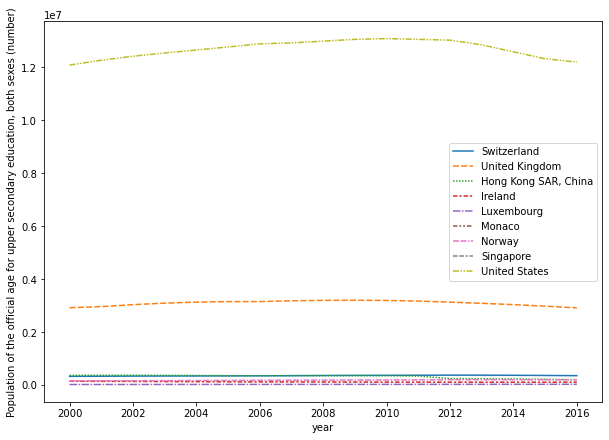

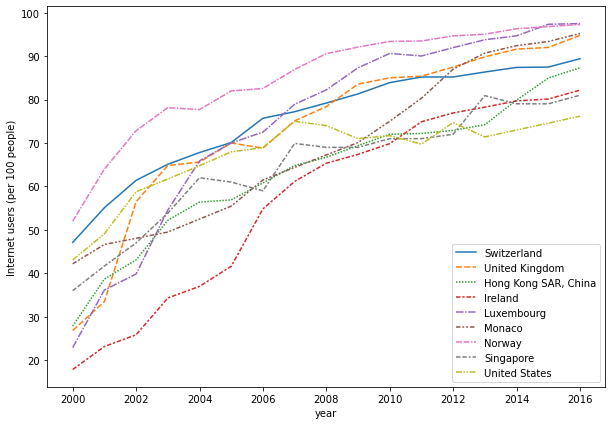

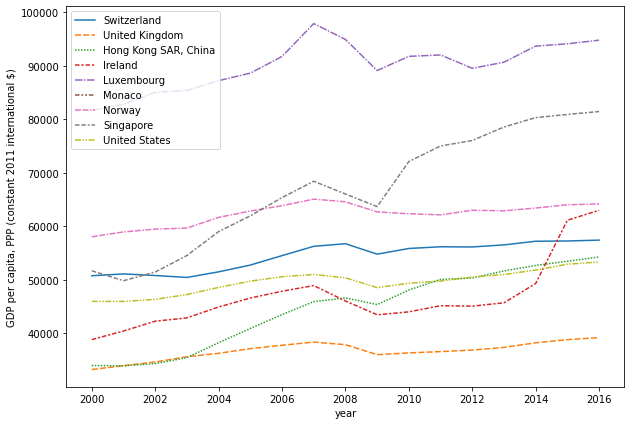

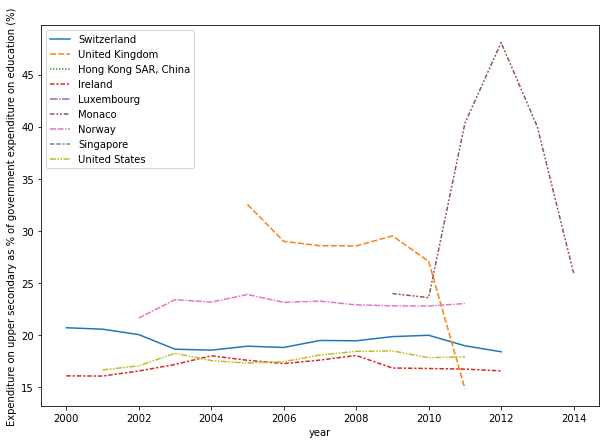

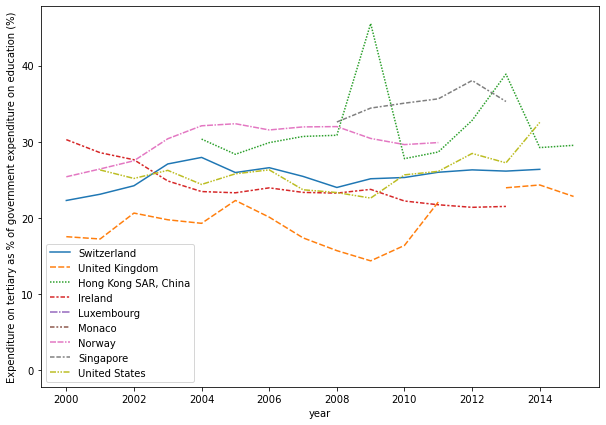

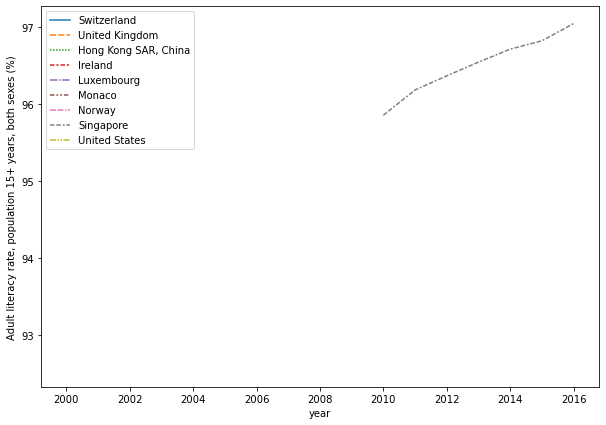

In [132]:
values = {}
countries = d.index.get_level_values(0)
years = d.index.get_level_values(1).unique()
for i, s in enumerate(selected):
    for c in countries:
        values[c] = d.loc[c, s].values
    
    p = pd.DataFrame(values, index=years)

    plt.figure(figsize=(10, 7))
    sns.lineplot(data=p)
    plt.ylabel(s)
    plt.show()

- Certains indicateurs, Internet users et GDP per capita sont clairement orientés à la hausse pour tous, ou du moins la grande majorité des pays.
- Les indicateurs liés aux dépenses du gouvernement dans l'éducation dessinent des tendances variables d'un pays à l'autre: en ce qui concerne le secondaire, seule la Norvège semble orientée à la hausse. En ce qui concerne les dépenses dans le supérieur, les E.U., la Suisse semblent être en hausse. L'évolution est moins claire pour les autres pays, où l'on peut quand même déceler une tendance à la stabilité.

La figure montrant 'Population of the official age for upper secondary education, both sexes (number)' est rendu peu lisible à cause du poids des E.U. On peut donc essayer de visualiser les données pour les pays plus petits en enlevant les E.U.

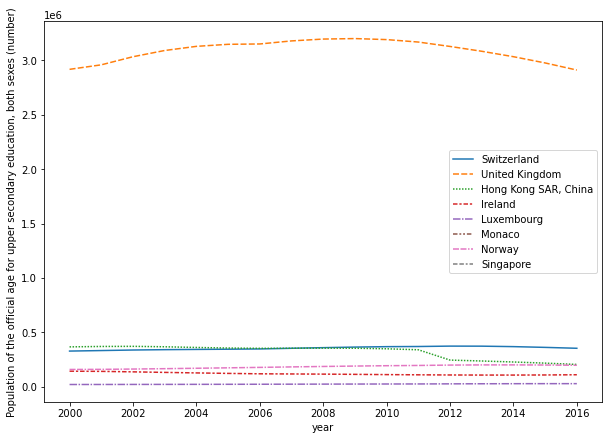

In [133]:
values = {}
countries = countries.unique().drop("United States")

years = d.index.get_level_values(1).unique()
for c in countries:
    values[c] = d.loc[c, 'Population of the official age for upper secondary education, both sexes (number)'].values
p = pd.DataFrame(values, index=years)

plt.figure(figsize=(10, 7))
sns.lineplot(data=p)
plt.ylabel('Population of the official age for upper secondary education, both sexes (number)')
plt.show()

On enlève également le R.U. ...

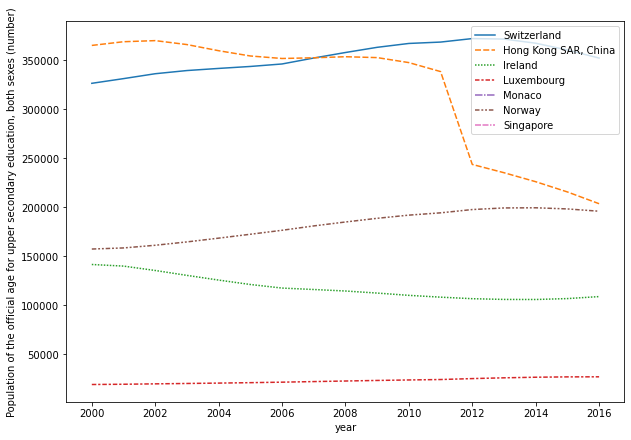

In [134]:
values = {}
countries = countries.unique().drop("United Kingdom")

years = d.index.get_level_values(1).unique()
for c in countries:
    values[c] = d.loc[c, 'Population of the official age for upper secondary education, both sexes (number)'].values
p = pd.DataFrame(values, index=years)

plt.figure(figsize=(10, 7))
sns.lineplot(data=p)
plt.ylabel('Population of the official age for upper secondary education, both sexes (number)')
plt.show()

Si on se concentre sur la population en âge d'aller au lycée, seuls l'Irlande et le Luxembourg semblent évoluer à la hausse.

# --------- FIN ----------------------